In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 65.8 MB/s eta 0:00:00


In [ ]:
!pip install tabula-py

In [ ]:
import os
import pdfplumber
import re
import pandas as pd
import tabula
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Directory containing your PDF files
pdf_directory = "/content/drive/MyDrive/college_pdf"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Initialize lists to store total values and file names
all_nt_values = []
all_ne_values = []
file_names = []

# Loop through PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            # Use tabula to extract tables from the PDF
            tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

            # Assuming tables[0] contains '2020-21' column and tables[1] contains 'Total Students' column
            total_nt = tables[0]['2021-22'].sum()
            total_ne = tables[1]['Total Students'].sum()

            # Append the values to the lists
            all_nt_values.append(total_nt)
            all_ne_values.append(total_ne)
            file_names.append(filename)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Create a single DataFrame with 'NT', 'NE', and 'File Name' columns
combined_dataframe = pd.DataFrame({'NT': all_nt_values, 'NE': all_ne_values, 'File Name': file_names})

# Display the combined DataFrame
print("Combined DataFrame:")
combined_dataframe


Dec 18, 2023 5:31:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:31:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:31:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:31:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:29 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:32:58 AM o

Combined DataFrame:


,NT,NE,File Name
0,1810,6643,iit madras.pdf
1,2796,7597,iit delhi.pdf
2,2612,8444,iit bombay.pdf
3,2166,5871,iit kanpur.pdf
4,2143,6043,iit roorkee.pdf
...,...,...,...
95,1444,5391,R.V. College of Engineering.pdf
96,612,1687,IIITDM.pdf
97,1176,3820,SR University.pdf
98,365,933,"Amity University Haryana, Gurgaon.pdf"


In [ ]:
combined_dataframe

,NT,NE,File Name
0,1810,6643,iit madras.pdf
1,2796,7597,iit delhi.pdf
2,2612,8444,iit bombay.pdf
3,2166,5871,iit kanpur.pdf
4,2143,6043,iit roorkee.pdf
...,...,...,...
95,1444,5391,R.V. College of Engineering.pdf
96,612,1687,IIITDM.pdf
97,1176,3820,SR University.pdf
98,365,933,"Amity University Haryana, Gurgaon.pdf"


In [ ]:
# Navigate to the folder where your PDF files are located
pdf_folder_path = '/content/drive/MyDrive/college_pdf'
os.chdir(pdf_folder_path)

# List PDF files
pdf_files = [file for file in os.listdir() if file.endswith('.pdf')]

# Initialize a list to store extracted data
extracted_data = []

# Access and process PDF files
for pdf_file_path in pdf_files:
    with pdfplumber.open(pdf_file_path) as pdf:
        # Extract text from the first three pages
        for page_number in range(1, 4):
            current_page = pdf.pages[page_number - 1]
            text = current_page.extract_text()

            # Example: Extracting total students from the text
            total_students_match = re.search(r'Total Students\nFull Time (\d+)\nPart Time (\d+)', text)
            if total_students_match:
                full_time_students = int(total_students_match.group(1))
                part_time_students = int(total_students_match.group(2))
                extracted_data.append({
                    'file': pdf_file_path,
                    'page': page_number,
                    'full_time_students': full_time_students,
                    'part_time_students': part_time_students,
                })

# Print the extracted data
extracted_data


[{'file': 'iit madras.pdf',
  'page': 2,
  'full_time_students': 2392,
  'part_time_students': 43},
 {'file': 'iit delhi.pdf',
  'page': 2,
  'full_time_students': 3114,
  'part_time_students': 630},
 {'file': 'iit bombay.pdf',
  'page': 2,
  'full_time_students': 3745,
  'part_time_students': 303},
 {'file': 'iit kanpur.pdf',
  'page': 2,
  'full_time_students': 2136,
  'part_time_students': 34},
 {'file': 'iit roorkee.pdf',
  'page': 2,
  'full_time_students': 2360,
  'part_time_students': 307},
 {'file': 'iit kharagpur.pdf',
  'page': 2,
  'full_time_students': 3534,
  'part_time_students': 0},
 {'file': 'iit guwahati.pdf',
  'page': 2,
  'full_time_students': 2473,
  'part_time_students': 148},
 {'file': 'iit hyderabad.pdf',
  'page': 2,
  'full_time_students': 584,
  'part_time_students': 144},
 {'file': 'iit tiruchirappalli.pdf',
  'page': 2,
  'full_time_students': 647,
  'part_time_students': 256},
 {'file': 'Jadavpur University.pdf',
  'page': 2,
  'full_time_students': 906,
 

In [ ]:
extracted_data_df = pd.DataFrame(extracted_data)

In [ ]:
# Sum the columns using the + operator
extracted_data_df['NP'] = extracted_data_df['full_time_students'] + extracted_data_df['part_time_students']
extracted_data_df = pd.concat([extracted_data_df, combined_dataframe], axis=1)

# Remove columns 'B' and 'C'
columns_to_remove = ['full_time_students', 'part_time_students', 'file', 'page']
extracted_data_df = extracted_data_df.drop(columns=columns_to_remove)

# Display the DataFrame after removing columns
print("\nDataFrame after removing columns:")
extracted_data_df


DataFrame after removing columns:


,NP,NT,NE,File Name
0,2435,1810,6643,iit madras.pdf
1,3744,2796,7597,iit delhi.pdf
2,4048,2612,8444,iit bombay.pdf
3,2170,2166,5871,iit kanpur.pdf
4,2667,2143,6043,iit roorkee.pdf
...,...,...,...,...
95,408,1444,5391,R.V. College of Engineering.pdf
96,204,612,1687,IIITDM.pdf
97,81,1176,3820,SR University.pdf
98,275,365,933,"Amity University Haryana, Gurgaon.pdf"


In [ ]:
df1 = pd.DataFrame({'SS': [18.50, 18.43, 18.50, 18.50, 17.61, 18.45, 18.50, 12.65, 17.50, 17.35, 20.00, 17.50, 17.59, 10.88, 16.80, 17.50, 15.00, 10.00, 18.00, 17.16, 16.50, 11.05, 16.00, 10.82, 18.84, 10.50, 17.36, 17.55, 18.90, 11.04, 15.50, 11.00, 9.24, 16.47, 13.44, 16.47, 15.25, 18.95, 20.00, 13.34, 10.99, 14.04, 14.42, 17.43, 12.50, 15.59, 10.95, 7.19, 16.01, 18.00, 6.79, 7.11, 12.52, 14.50, 9.50, 12.86, 5.00, 15.11, 9.32, 16.21, 16.34, 14.00, 14.71, 15.50, 14.05, 15.46, 8.08, 11.49, 7.56, 14.08, 2.89, 5.81, 11.50, 6.16, 11.42, 12.97, 11.89, 13.75, 8.00, 15.45, 6.59, 13.01, 14.00, 9.50, 13.85, 14.30, 13.10, 6.43, 10.38, 5.84, 12.40, 14.43, 7.00, 12.50, 7.15, 14.00, 8.83, 10.93, 7.89, 14.30]})

In [ ]:
# Concatenate the two DataFrames vertically (along rows)
df = pd.concat([df1, extracted_data_df], axis=1)

# Display the horizontally combined DataFrame

In [ ]:
df

,SS,NP,NT,NE,File Name
0,18.50,2435,1810,6643,iit madras.pdf
1,18.43,3744,2796,7597,iit delhi.pdf
2,18.50,4048,2612,8444,iit bombay.pdf
3,18.50,2170,2166,5871,iit kanpur.pdf
4,17.61,2667,2143,6043,iit roorkee.pdf
...,...,...,...,...,...
95,14.00,408,1444,5391,R.V. College of Engineering.pdf
96,8.83,204,612,1687,IIITDM.pdf
97,10.93,81,1176,3820,SR University.pdf
98,7.89,275,365,933,"Amity University Haryana, Gurgaon.pdf"


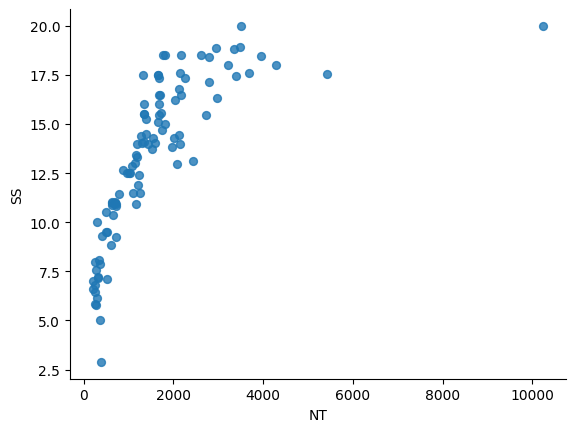

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='NT', y='SS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

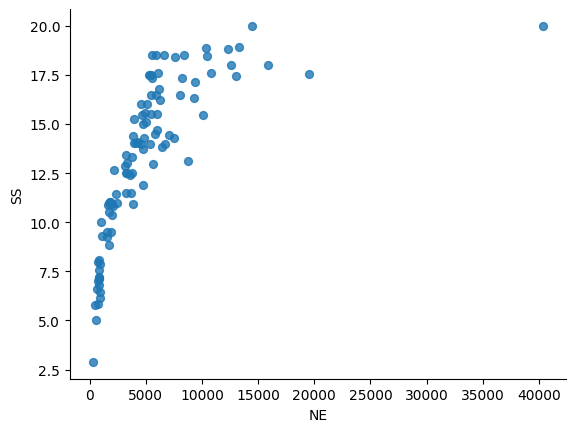

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='NE', y='SS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

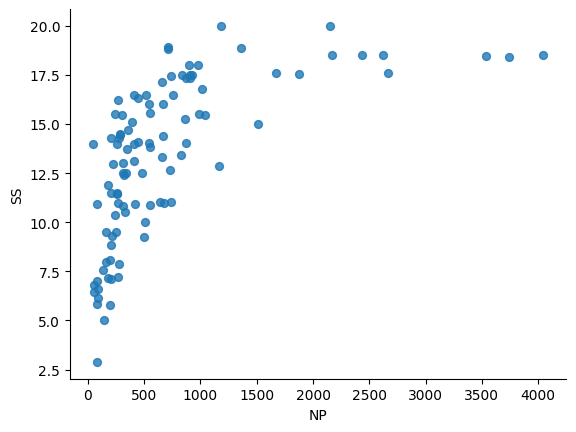

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='NP', y='SS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

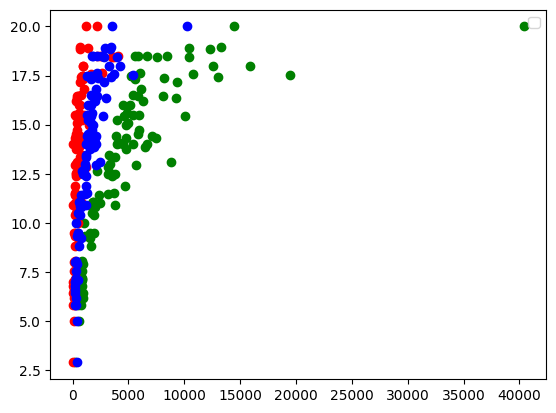

In [ ]:
import matplotlib.pyplot as plt

x = df['NE']
y = df['SS']

# depict first scatted plot
plt.scatter(x, y, c='green')

# second data point
x = df['NP']
y = df['SS']

# depict second scatted plot
plt.scatter(x, y, c='red')

x = df['NT']
y = df['SS']

# depict second scatted plot
plt.scatter(x, y, c='blue')
plt.legend()
# depict illustration
plt.show()


#Train, validation, test datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is already defined and contains the necessary columns
# Here, 'NT', 'NE', 'NP', and 'SS' are column names

# Split the data into features (X) and target variable (y)
X = df[['NT', 'NE', 'NP']]
y = df['SS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = DecisionTreeRegressor()

# Train the model
reg = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.6949549999999995


In [ ]:

# Now, you can use the trained model to make predictions on new data
# For example, if you have new values for NT, NE, and NP
new_data = pd.DataFrame({'NT': [676], 'NE': [1386], 'NP': [305]})
predicted_ss = model.predict(new_data)

print(f'Predicted SS: {predicted_ss[0]}')


Predicted SS: 9.24


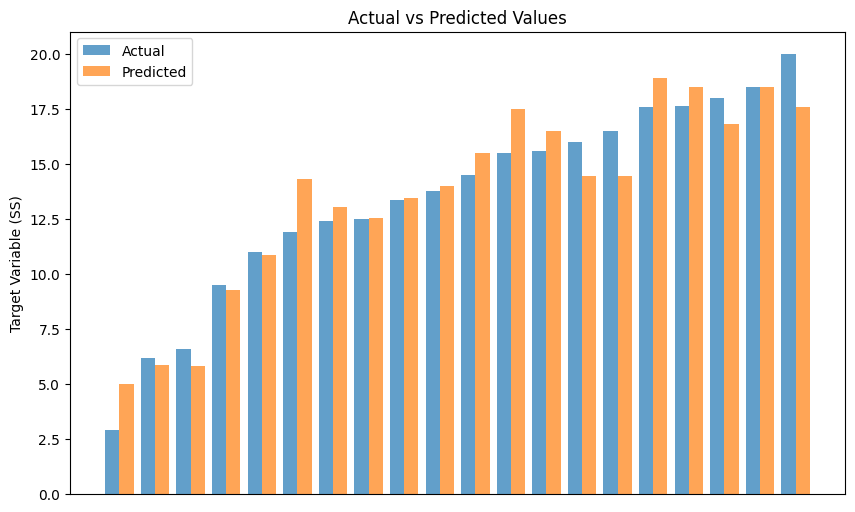

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the actual and predicted values in y_test and y_pred

# Get indices for sorting
indices = np.argsort(y_test)

# Sort actual and predicted values based on y_test
y_test_sorted = np.array(y_test)[indices]
y_pred_sorted = np.array(y_pred)[indices]

# Create an array for the x-axis ticks
x_ticks = np.arange(len(y_test))

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for actual values
plt.bar(x_ticks - 0.2, y_test_sorted, width=0.4, label='Actual', alpha=0.7)

# Bar plot for predicted values
plt.bar(x_ticks + 0.2, y_pred_sorted, width=0.4, label='Predicted', alpha=0.7)

# Hide x-axis values
plt.xticks([])

# Adding labels and title
# plt.xlabel('Sample Index')
plt.ylabel('Target Variable (SS)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


#Calulate Median Salary(GMS) function

In [ ]:
import tabula
import os
import pandas as pd
import re

# Initialize lists to store total values and file names
all_median_salary = []
file_names = []

def text_to_numeric(text):
    # Extract numeric part from the text using regular expression
    match = re.search(r'\b(\d+)\b', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

# Loop through PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            # Use tabula to extract tables from the PDF
            tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

            # Assuming tables[0] contains '2020-21' column and tables[1] contains 'Total Students' column
            total_median_salary = tables[2]['Median salary of\rplaced graduates per\rannum(Amount in\rRs.)'].apply(text_to_numeric).sum()

            # Append the values to the lists
            all_median_salary.append(total_median_salary)
            file_names.append(filename)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Create a single DataFrame with 'NT', 'NE', and 'File Name' columns
median_salary_dataframe = pd.DataFrame({'MS': all_median_salary, 'File Name': file_names})

# Display the combined DataFrame
print("median_salary_dataframe :")
median_salary_dataframe


Dec 18, 2023 5:37:24 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:34 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:36 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:38 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:47 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:49 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 18, 2023 5:37:54 AM o

median_salary_dataframe :


,MS,File Name
0,4700000,iit madras.pdf
1,5360000,iit delhi.pdf
2,4439000,iit bombay.pdf
3,5822000,iit kanpur.pdf
4,5126000,iit roorkee.pdf
...,...,...
95,2500000,R.V. College of Engineering.pdf
96,2800000,IIITDM.pdf
97,1266000,SR University.pdf
98,1153000,"Amity University Haryana, Gurgaon.pdf"


In [ ]:
df3 = pd.DataFrame({'GMS': [20, 21.18, 19.5, 21.93, 20.78, 20.73, 22.09, 21.12, 17.02, 15.95, 13.38, 16.87, 11.72, 20.37, 20.27, 14.52, 17.91, 16.71, 10.21, 15.00, 17.42, 18.96, 16.24, 13.54, 19.66, 15.00, 9.54, 9.54, 17.44, 18.42, 10.18, 11.43, 21.25, 12.41, 13.52, 10.62, 14.40, 12.56, 11.15, 14.72, 19.77, 15.58, 13.99, 11.36, 12.25, 13.59, 19.01, 16.27, 16.84, 11.19, 16.62, 8.72, 15.13, 10.23, 25.00, 14.14, 20.82, 12.25, 16.45, 18.80, 13.34, 11.18, 11.25, 8.96, 13.82, 9.30, 17.20, 12.41, 16.15, 14.59, 12.79, 13.33, 14.90, 23.16, 20.00, 11.38, 11.07, 11.65, 13.87, 15.30, 17.39, 13.58, 10.09, 14.04, 10.14, 10.09, 9.08, 21.40, 23.23, 13.34, 12.96, 12.34, 15.54, 11.16, 12.94, 14.69, 15.59, 9.82, 9.24, 10.45]})

In [ ]:
# Concatenate the two DataFrames vertically (along rows)
median_salary_dataframe = pd.concat([df3, median_salary_dataframe], axis=1)

#Display the median dataframe

In [ ]:
median_salary_dataframe

,GMS,MS,File Name
0,20.00,4700000,iit madras.pdf
1,21.18,5360000,iit delhi.pdf
2,19.50,4439000,iit bombay.pdf
3,21.93,5822000,iit kanpur.pdf
4,20.78,5126000,iit roorkee.pdf
...,...,...,...
95,14.69,2500000,R.V. College of Engineering.pdf
96,15.59,2800000,IIITDM.pdf
97,9.82,1266000,SR University.pdf
98,9.24,1153000,"Amity University Haryana, Gurgaon.pdf"


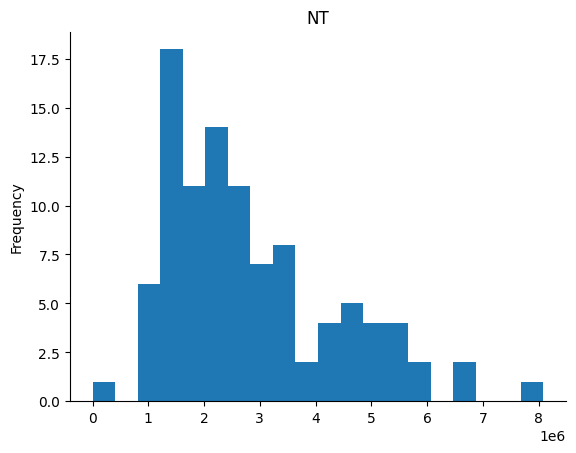

In [ ]:
from matplotlib import pyplot as plt
median_salary_dataframe['MS'].plot(kind='hist', bins=20, title='NT')
plt.gca().spines[['top', 'right',]].set_visible(False)

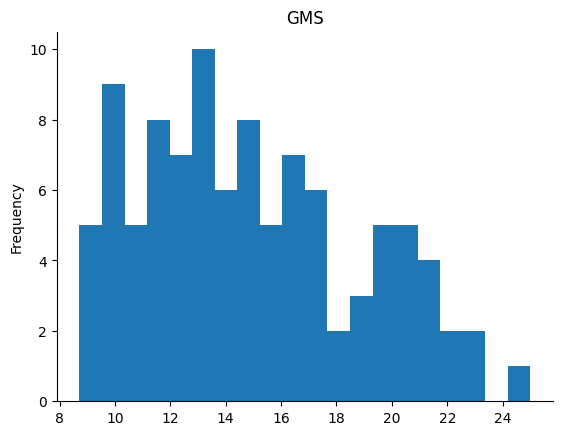

In [ ]:
from matplotlib import pyplot as plt
median_salary_dataframe['GMS'].plot(kind='hist', bins=20, title='GMS')
plt.gca().spines[['top', 'right',]].set_visible(False)

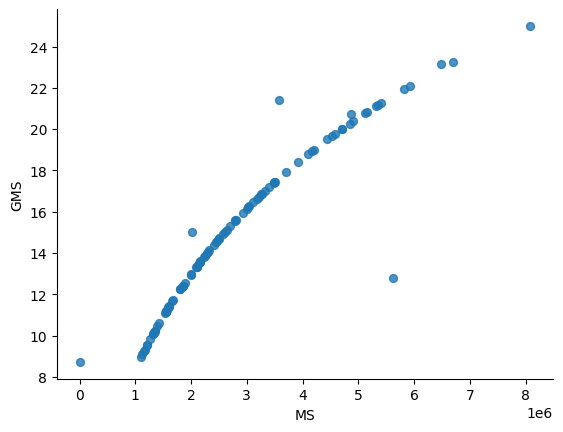

In [ ]:
from matplotlib import pyplot as plt
median_salary_dataframe.plot(kind='scatter', x='MS', y='GMS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Train, validation, test median salary datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is already defined and contains the necessary columns
# Here, 'NT', 'NE', 'NP', and 'SS' are column names

# Split the data into features (X) and target variable (y)
X = median_salary_dataframe[['MS']]
y = median_salary_dataframe['GMS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = DecisionTreeRegressor()

# Train the model
reg = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.188270000000001


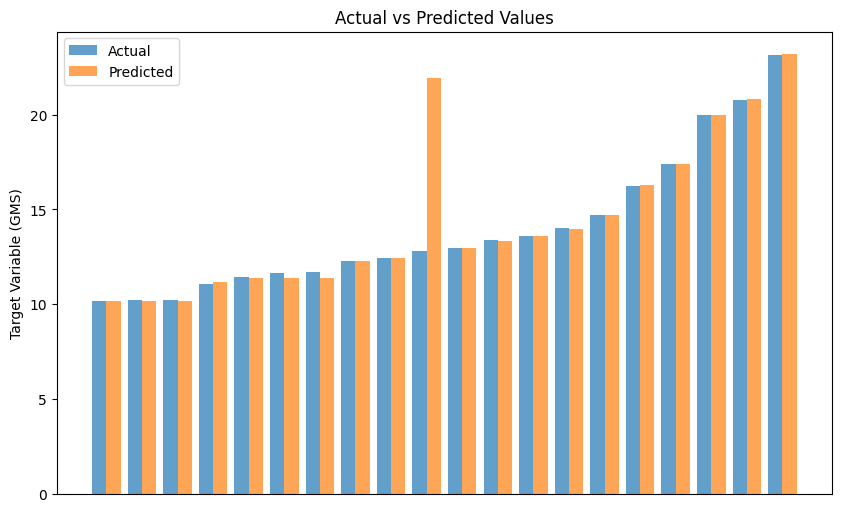

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the actual and predicted values in y_test and y_pred

# Get indices for sorting
indices = np.argsort(y_test)

# Sort actual and predicted values based on y_test
y_test_sorted = np.array(y_test)[indices]
y_pred_sorted = np.array(y_pred)[indices]

# Create an array for the x-axis ticks
x_ticks = np.arange(len(y_test))

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for actual values
plt.bar(x_ticks - 0.2, y_test_sorted, width=0.4, label='Actual', alpha=0.7)

# Bar plot for predicted values
plt.bar(x_ticks + 0.2, y_pred_sorted, width=0.4, label='Predicted', alpha=0.7)

# Hide x-axis values
plt.xticks([])

# Adding labels and title
# plt.xlabel('Sample Index')
plt.ylabel('Target Variable (GMS)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


#Calculate Financial Resources and their Utilisation (FRU)

In [ ]:
import tabula
import os
import pandas as pd


# Loop through PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            # Use tabula to extract tables from the PDF
            tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

            # Print the first table for inspection
            if tables:
                print(f"First table for {filename}:")
                print(tables[7])
            else:
                print(f"No tables found in {filename}")

            # Continue with your processing logic...

        except Exception as e:
            print(f"Error processing {filename}: {e}")



Dec 18, 2023 5:41:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit madras.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  219593796 (Twenty One Crore Ninety Five Lakhs ...   
3  4525906053 (Four Hundred and Fifty Two Crore F...   
4  16830244 (One Crore Sixty Eight Lakhs Thirty T...   
5  1062045121 (One Hundred and Six Crore Twenty L...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  212299912 (

Dec 18, 2023 5:41:16 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit delhi.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  183339247 (Eighteen Crore Thirty Three Lakh Th...   
3  2372989697 (Two Hundred Thirty Seven Crore Twe...   
4  44456874 (Four Crore Forty Four Lakh Fifty Six...   
5  1396232731 (One Hunred Thirty Nine Crore Sixty...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  165806523 (S

Dec 18, 2023 5:41:18 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit bombay.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  375450963 (Thirty Seven Crore Fifty Four Lakh ...   
3  859086724 (Eighty Five Crore Ninety Lakh Eight...   
4  99980000 (Nine Crore Ninety Nine Lakh Eighty T...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  301195242 (Thirty Crore Eleven Lakh Ninety Fiv...   
3  922913433 (Ninety Two Crore Twenty Lakhs Thirt...   
4  11208500 (O

Dec 18, 2023 5:41:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit kanpur.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  3132324000 (Three Hundred Thirteen Crore Twent...   
3  3931518000 (Three Hundred Ninety Three Crore F...   
4             46800000 (Four Crore Sixty Eight Lakh)   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  3072400000 (Three Hundred Seven Crore Twenty F...   
3  3972820000 (Three Hundred Ninety Seven Crore T...   
4             

Dec 18, 2023 5:41:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit roorkee.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  248408443 (Twenty Four Crore Eighty Four Lakhs...   
3  766703384 (Seventy Six Crore Sixty Seven Lakhs...   
4  17442828 (One Crore Seventy Four Lakhs Forty T...   
5  306487803 (Thirty Crore Sixty Four Lakhs Eight...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  145024441 

Dec 18, 2023 5:41:24 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit kharagpur.pdf:
  Ph.D (Student pursuing doctoral program till 2021-22)      Unnamed: 0
0                                                NaN     Total Students
1                                          Full Time               3534
2                                          Part Time                  0
3  No. of Ph.D students graduated (including Inte...                NaN


Dec 18, 2023 5:41:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit guwahati.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  1655960697 (One sisty five crore fifty nine la...   
3  738569173 (Seventy three crore eighty five lak...   
4  12197738 (One crore twenty one lakh ninety sev...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  1725760314 (One seven two crore fifty seven la...   
3  1457938450 (One forty five crore seventy nine ...   
4  11794148 

Dec 18, 2023 5:41:29 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit hyderabad.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  35657429 (Three Crore Fifty Six Lakh Fifty Sev...   
3  360785745 (Thirty Six Crore Seven Lakh Eighty ...   
4                                 600000 (Six lakhs)   
5  135612446 (Thirteen Crore Fifty Six Lakh Twelv...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  36056910

Dec 18, 2023 5:41:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit tiruchirappalli.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  1389753614 (RUPEES ONE HUNDRED AND THIRTY EIGH...   
3  940335091 (RUPEES NINETY FOUR CRORE THREE LAKH...   
4  10396829 (RUPEES ONE CRORE THREE LAKH NINETY S...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  1255619756 (RUPEES ONE HUNDRED AND TWENTY FIVE...   
3  1087633696 (RUPEES ONE HUNDRED AND EIGHT\rCROR...   
4  32

Dec 18, 2023 5:41:35 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Jadavpur University.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  1158946874 (Rupees One Hundred And Fifteen Cro...   
3  705183857 (Rupees Seventy Crore Fifty One Lakh...   
4  8329818 (Rupees Eighty Three Lakh Twenty Nine ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  1150929984 (Rupees One Hundred And Fifteen Cro...   
3  637123563 (Rupees Sixty Three Crore Seventy On...   
4  10

Dec 18, 2023 5:41:37 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Vellore Institute of Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  4271984 (Forty Two Lakh Seventy One Thousand N...   
3  152746414 (Fifteen Crore Twenty Seven Lakh For...   
4  3942784 (Thirty Nine Lakh forty Two Thousand S...   
5  418975781 (Forty One Crore Eighty Nine Lakh Se...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                

Dec 18, 2023 5:41:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Surathkal.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects      222      226      200
1    Total no. of Funding Agencies       64       29       40


Dec 18, 2023 5:41:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Anna University.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  2522026452 (Rupees Two Hundred and Fifty Two C...   
3  366998019 (Rupees Thirty Six Crore Sixty Nine ...   
4  13709721 (Rupees One Crore Thirty Seven Lakh N...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  2160906943 (Rupees Two Hundred and Sixteen Cro...   
3  329992237 (Rupees Thirty Two Crore Ninety Nine...   
4  309244

Dec 18, 2023 5:41:43 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit indore.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  558261242 (Fifty Five Crore Eighty Two Lakh Si...   
3  439197669 (Forty Three Crore Ninety One Lakh N...   
4  8881716 (Eighty Eight Lakh Eighty One Thousand...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  484268298 (Forty Eight Crore Forty Two Lakh Si...   
3  419015875 (Forty One Crore Ninety Lakh Fifteen...   
4  28332484 (T

Dec 18, 2023 5:41:46 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for bhu.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  83885967 (Rupees Eight Crore Thirty Eight Lakh...   
3  147678327 (Rupees Fourteen Crore Seventy Six L...   
4  26504291 (Rupees Two Crore Sixty Five Lakh Fou...   
5  82909537 (Rupees Eight Crore Twenty Nine Lakh ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  71962850 (Rupees S

Dec 18, 2023 5:41:49 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Rourkela.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  20657104 (RUPEES TWO CRORES SIX LAKHS FIFTY\rS...   
3  109660339 (RUPEES TEN CRORE NINETY SIX LAKH SI...   
4  40950683 (RUPEES FOUR CRORE NINE LAKH FIFTY\rT...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  47156494 (RUPEES FOUR CRORE SEVENTY ONE LAKH\r...   
3  87841032 (RUPEES  EIGHT CRORE SEVENTY EIGHT LA...   
4  24728491 

Dec 18, 2023 5:41:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for ism.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  108122599 (Ten Crore Eighty One Lakh Twenty Tw...   
3  306142110 (Thirty Crore Sixty One Lakh Forty T...   
4  189722 (One Lakh Eighty Nine Thousand Seven Hu...   
5  138188357 (Thirteen Crore Eighty One Lakh Eigh...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  42565586 (Four Cro

Dec 18, 2023 5:41:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit Gandhinagar.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects      242      255      230
1    Total no. of Funding Agencies       49       50       51


Dec 18, 2023 5:41:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Amrita Vishwa Vidyapeetham.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       54       47       69
1    Total no. of Funding Agencies       40       33       40


Dec 18, 2023 5:41:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Thapar.pdf:
                             Financial Year    2021-22   2020-21   2019-20
0           Total no. of Sponsored Projects         52        66        56
1             Total no. of Funding Agencies         24        34        25
2  Total Amount Received (Amount in Rupees)  103620000  84804000  93013000


Dec 18, 2023 5:41:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Warangal.pdf:
                             Financial Year   2021-22   2020-21    2019-20
0           Total no. of Sponsored Projects        52        64        135
1             Total no. of Funding Agencies        17        18          5
2  Total Amount Received (Amount in Rupees)  87901729  73568799  204223717


Dec 18, 2023 5:42:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit ropar.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  39879613 (Three Crore Ninety Eight Lakh Sevent...   
3  175879552 (Seventeen Crore Fifty Eight Lakh Se...   
4  9914230 (Ninety Nine Lakh Fourteen Thousand Tw...   
5  19760201 (One Crore Ninety Seven Lakh Sixty Th...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  32264112 (Th

Dec 18, 2023 5:42:05 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit calicut.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       76       89       71
1    Total no. of Funding Agencies       17       33       14


Dec 18, 2023 5:42:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for ict.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  8463850 (Eighty four lakhs sixty three thousan...   
3  186985003 (Eighteen crore sixty nine lakh eigh...   
4                           700000 (seven lakh only)   
5  40727980 (Four crore seven lakh twenty seven t...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  46860057 (Four Cro

Dec 18, 2023 5:42:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for bits pilani.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  2415679120 (Two Hundred Forty One Crore Fifty ...   
3  1062120142 (One Hundred Six Crore Twenty One L...   
4  1102634 (Eleven Lakh Two Thousand Six Hundred ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  2049058001 (Two Hundred Four Crore Ninety Lakh...   
3  892952551 (Eighty Nine Crore Twenty Nine Lakh ...   
4  986730 (Ni

Dec 18, 2023 5:42:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Jamia Millia Islamia.pdf:
                             Financial Year   2021-22   2020-21   2019-20
0           Total no. of Sponsored Projects        34        35        34
1             Total no. of Funding Agencies         9         9         9
2  Total Amount Received (Amount in Rupees)  85800155  75460997  90650325


Dec 18, 2023 5:42:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Siksha `O` Anusandhan.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  1381391664 (RUPEES ONE HUNDRED THIRTY EIGHT\rC...   
3  1414728444 (RUPEES ONE HUNDRED FORTY ONE CRORE...   
4  17378213 (RUPEES ONE CRORE SEVENTY THREE LAKH\...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  1144703896 (RUPEES ONE HUNDRED FOURTEEN CRORE\...   
3  1297841571 (RUPEES ONE HUNDRED TWENTY NINE\rCR...   
4  

Dec 18, 2023 5:42:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for srm.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       95       84      111
1    Total no. of Funding Agencies       22       19       22


Dec 18, 2023 5:42:18 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for dtu.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       29       31      104
1    Total no. of Funding Agencies       15       15       15


Dec 18, 2023 5:42:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for IIT Jodhpur.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects      220      142      120
1    Total no. of Funding Agencies       43       31       27


Dec 18, 2023 5:42:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Amity University.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  10438366 (One Crore Four Lakh Thirty Eight Tho...   
3  1868579 (Eighteen Lakh Sixty Eight Thousand Fi...   
4                                          0 (zero )   
5  14355233 (One Crore Forty Three Lakh Fifty Fiv...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  10200

Dec 18, 2023 5:42:25 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Aligarh Muslim University.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       13       23       34
1    Total no. of Funding Agencies       11        9       19


Dec 18, 2023 5:42:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit mandi.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  35101895 (Three crore fifty one lakh one thous...   
3  37610048 (Three crore seventy six lakh forty e...   
4  46767696 (Four crore sixty seven lakh sixty se...   
5  28221512 (Two Crore eighty two lakh twenty one...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  46390582 (fo

Dec 18, 2023 5:42:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Shanmugha Arts Science Technology & Research Academy.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  32427774 (Three crore twenty four lakh twenty ...   
3  349427816 (Thirty four crore ninety four lakh ...   
4                                           0 (Zero)   
5  1130851876 (One hundred and thirteen crore eig...   

                                             2020-21  \
0                                    Utilised Amount   
1                           

Dec 18, 2023 5:42:31 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iiest Shibpur.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       17       43       79
1    Total no. of Funding Agencies        9       16       29


Dec 18, 2023 5:42:34 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Kalasalingam Academy of Research and Education.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  749358004 (Seventy Four Crore Ninety Three Lak...   
3  581258097 (Fifty Eight Crore Twelve Lakh Fifty...   
4  67582943 (Six Crore Seventy Five Lakh Eighty T...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  677430641 (Sixty Seven Crore Seventy Four Lakh...   
3  521538500 (Fifty Two Crore Fift

Dec 18, 2023 5:42:36 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for mnit jaipur.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       27       23       30
1    Total no. of Funding Agencies       14       10        9


Dec 18, 2023 5:42:38 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Chandigarh University.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       52       29       33
1    Total no. of Funding Agencies       45       26       23


Dec 18, 2023 5:42:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Kalinga Institute of Industrial Technology.pdf:
                             Financial Year   2021-22    2020-21   2019-20
0           Total no. of Sponsored Projects        88         64        53
1             Total no. of Funding Agencies        33         29        25
2  Total Amount Received (Amount in Rupees)  74737471  129703280  66224740


Dec 18, 2023 5:42:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nitSilchar.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       32       62       33
1    Total no. of Funding Agencies       11       19       11


Dec 18, 2023 5:42:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit patna.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       40       38       46
1    Total no. of Funding Agencies       16       15       19


Dec 18, 2023 5:42:46 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for vnit nagpur.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects      120      146      115
1    Total no. of Funding Agencies       56       60       45


Dec 18, 2023 5:42:49 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Durgapur.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  64127625 (Six Crore Forty One Lakh Twenty Seve...   
3  52083144 (Five Crore Twenty Lakhs Eighty Three...   
4        1250000 (Twelve Lakhs Fifty Thousand Only )   
5  44522568 (Four Crore Forty Five Lakhs Twenty T...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  79349519 

Dec 18, 2023 5:42:52 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for K L College of Engineering.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects      153      139      109
1    Total no. of Funding Agencies       14       16       12


Dec 18, 2023 5:42:54 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Sri Sivasubramaniya Nadar College of Engineerin.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       47       15       35
1    Total no. of Funding Agencies       12       10       19


Dec 18, 2023 5:42:56 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Jalandhar.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  753824026 (Seventy Five Crore Thirty Eight Lak...   
3  327937598 (Thirty Two Crore Seventy Nine Lakh ...   
4  2197815 (Twenty One Lakh Ninety Seven Thousand...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  598019954 (Fifty Nine Crore Eighty Lakh Ninete...   
3  319213372 (Thirty One Crore Ninety Two Lakh Th...   
4  8705297 

Dec 18, 2023 5:42:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit Bhubaneswar.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  96036283 (Nine Crore Sixty Lakh  Thirty Six Th...   
3  83246887 (Eight Crore Thirty Two Lakh Forty Si...   
4  22133973 (Two Crore Twenty One Lakhs Thirty Th...   
5  44266661 (Four Crore Forty Two Lakh Sixty Six ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  580608

Dec 18, 2023 5:42:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Indian Institute of Space Science and Technology.pdf:
                               Engineering Workshops  \
0  Other expenditure on creation of Capital Asset...   

  125852 (One Lakh Twenty Five Thousand Eight Hundred Fifty\rTwo Only)  \
0  12720250 (One Crore Twenty Seven Lakh Twenty T...                     

  218120 (Two Lakh Eihhteen Thousand One Hundred Twenty\rOnly)  \
0  6312450 (Sixty Three Lakh Twelve Thousand Four...             

  478557 (Four Lakh Seventy Eight Thousand Five Hundred Fifty\rSeven Only)  
0  31623736 (Three Crore Sixteen Lakh Twenty Thre...                        


Dec 18, 2023 5:43:02 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Motilal Nehru National Institute of Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  890400832 (Eighty nine crore four lakh eight h...   
3  747488659 (Seventy four crore seventy four lak...   
4  7371741 (Seventy three lakh seventy one thousa...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  876378017 (Eighty seven crore sixty three lakh...   
3  641835408 (Sixty four crore eig

Dec 18, 2023 5:43:05 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for lpu.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  27160432 (Two Crore Seventy One Lakh Sixty Tho...   
3  14509224 (One Crore Forty Five Lakh Nine Thous...   
4                                           0 (Zero)   
5  17266195 (One Crore Seventy Two Lakh Sixty Six...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  16326806 (One Cror

Dec 18, 2023 5:43:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit delhi.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       20        9       10
1    Total no. of Funding Agencies       14        7        8


Dec 18, 2023 5:43:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Visvesvaraya Technological University.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects        2        0        9
1    Total no. of Funding Agencies        2        0        6


Dec 18, 2023 5:43:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for bits Ranchi.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       36       41       28
1    Total no. of Funding Agencies        9       12       15


Dec 18, 2023 5:43:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for UPES.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       16        9        2
1    Total no. of Funding Agencies       11        7        4


Dec 18, 2023 5:43:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iiit Hyderabad.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  11658174 (One Crore Sixteen Lakhs Fifty Eight ...   
3  41779260 (Four Crore Seventeen Lakh Seventy Ni...   
4  1775260 (Seventeen Lakhs Seventy Five Thousand...   
5  33751307 (Three Crore Thirty Seven Lakhs Fifty...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  1112968

Dec 18, 2023 5:43:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Patna.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       81       66       79
1    Total no. of Funding Agencies       23       16       17


Dec 18, 2023 5:43:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Defence Institute of Advanced Technology.pdf:
                             Financial Year  \
0         Total no. of Consultancy Projects   
1         Total no. of Client Organizations   
2  Total Amount Received (Amount in Rupees)   
3                  Amount Received in Words   

                                             2021-22  \
0                                                  8   
1                                                 10   
2                                          154365785   
3  Fifteen Crore Forty Three Lakh Sixty Five Thou...   

                                          2020-21  \
0                                               7   
1                                               5   
2                                        19230000   
3  One Crore Ninety Two Lakh Thirty Thousand only   

                                      2019-20  
0                                          18  
1                                          21  
2          

Dec 18, 2023 5:43:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Kurukshetra.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       24       33       42
1    Total no. of Funding Agencies        8       10       16


Dec 18, 2023 5:43:25 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit TIRUPATI.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  341974384 (Thirty Four Crore Nineteen Lakh Sev...   
3  233476680 (Twenty Three Crore Thirty Four Lakh...   
4  1572824 (Fifteen Lakh Seventy Two Thousand Eig...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  325593562 (Thirty Two Crore Fifty Five Lakh Ni...   
3  216413461 (Twenty One Crore Sixty Four Lakh Th...   
4           

Dec 18, 2023 5:43:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nsut.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects        9        4        5
1    Total no. of Funding Agencies        7        2        2


Dec 18, 2023 5:43:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for MANIPAL INSTITUTE OF TECHNOLOGY.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       43       47      102
1    Total no. of Funding Agencies       27       21       67


Dec 18, 2023 5:43:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Graphic Era University.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  380782000 (Rupees thirty eight crore seven lak...   
3  607590315 (Sixty Crore Seventy Five Lakh Ninet...   
4  2076478 (Twenty Lakh Seventy Six Thousand Four...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  362946000 (Rupees thirty six crore twenty nine...   
3  468410077 (Forty Six Crore Eighty Four Lakh Te...   
4 

Dec 18, 2023 5:43:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for PSG College of Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  35067000 (Three Crores Fifty Lakhs sixty seven...   
3  42302000 (Four Crores Twenty three lakhs and t...   
4                                           0 (Zero)   
5  16666000 (One Crore Sixty Six lakhs Sixty Six ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   

Dec 18, 2023 5:43:35 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Saveetha Institute of Medical and Technical Sciences.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects        0        0        0
1    Total no. of Funding Agencies        0        0        0


Dec 18, 2023 5:43:38 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for svnit.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  807976584 (Eighty crores seventy nine lakhs se...   
3  585730455 (Fifty eight crores fifty seven lakh...   
4  8160475 (Eight one lakhs sixty thousands four ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  726042936 (Seventy two crores sixty lakhs fort...   
3  555893710 (Fifty five crores fifty eight lakhs...   
4  9698584 (Ninety 

Dec 18, 2023 5:43:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Sathyabama Institute of Science and Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  1196944719 (One Hundred and Nineteen Crores Si...   
3  182442342 (Eighteen Crores Twenty Four Lakhs F...   
4  21225000 (Two Crores Twelve Lakhs Twenty Five ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  1162964750 (One Hundred and Sixteen Crores Twe...   
3  151521115 (Fifteen Crores Fifte

Dec 18, 2023 5:43:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit jammu.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  34306591 (three crores forty three lakhs six t...   
3  78517422 (Seven Crore Eighty Five Lakh Sevente...   
4  151458514 (Fifteen Crore Fourteen Lakh Fifty E...   
5  90941656 (nine crores nine lakhs forty one tho...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  25248479 (tw

Dec 18, 2023 5:43:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Banasthali Vidyapith.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects        8        8        4
1    Total no. of Funding Agencies        3        2        4


Dec 18, 2023 5:43:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit Palakkad.pdf:
                             Financial Year    2021-22    2020-21   2019-20
0           Total no. of Sponsored Projects         28         20        25
1             Total no. of Funding Agencies         16          7         7
2  Total Amount Received (Amount in Rupees)  113796867  104850811  41532722


Dec 18, 2023 5:43:47 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit raipur.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  16319824 (sixteen million three hundred ninete...   
3  33725187 (thirty three million seven hundred t...   
4  1774500 (one million seven hundred seventy fou...   
5  104276120 (one hundred four million two hundre...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  39910793 (T

Dec 18, 2023 5:43:50 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for University of Hyderabad.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects        9        2        7
1    Total no. of Funding Agencies        5        2        6


Dec 18, 2023 5:43:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Meghalaya.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  217748440 (Twenty one crore seventy seven lakh...   
3  45566401 (Four crore fifty five lakh sixty six...   
4       56500 (Fifty six thousand five hundred only)   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  173748574 (Seventeen crore thirty seven lakh f...   
3  963511 (Nine lakh sixty three thousand five hu...   
4          

Dec 18, 2023 5:43:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for College of Engineering, Pune.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects      148       52       55
1    Total no. of Funding Agencies       52       18       16


Dec 18, 2023 5:43:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iiit Bangalore.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  255301990 (Twenty Five Crores Fifty Three Lakh...   
3  1415539394 (One Forty One Crores Fifty Five La...   
4  6714541 (Sixty Seven Lakhs Fourteen Thousand F...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  238739294 (Twenty Three Crores Eighty Seven La...   
3  1407452551 (One Forty Crores Seventy Four lakh...   
4  675440 

Dec 18, 2023 5:43:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iiit delhi.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       64       82      105
1    Total no. of Funding Agencies       43       51       45


Dec 18, 2023 5:44:00 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Manipal University Jaipur.pdf:
                             Financial Year   2021-22   2020-21  2019-20
0           Total no. of Sponsored Projects        22         4       13
1             Total no. of Funding Agencies        13         3        6
2  Total Amount Received (Amount in Rupees)  29168635  14237000  7542419


Dec 18, 2023 5:44:02 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Sri Krishna College of Engineering and Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  6930875 (Sixty Nine Lakh Thirty Thousand Eight...   
3  68825321 (Six Crore Eighty Eight Lakh Twenty F...   
4  23057589 (Two Crore Thirty Lakh Fifty Seven Th...   
5  155654898 (Fifteen Crore Fifty Six Lakh Fifty ...   

                                             2020-21  \
0                                    Utilised Amount   
1                              

Dec 18, 2023 5:44:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for M. S. Ramaiah Institute of Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  687852978 (Sixty Eight Crore Seventy Eight Lak...   
3  240419708 (Twenty Four Crore Four Lakh Ninetee...   
4  3638103 (Thirty Six Lakh Thirty Eight Thousand...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  653995762 (Sixty Five Crore Thirty nine lakh n...   
3  180235223 (Eighteen crore two lakh thirt

Dec 18, 2023 5:44:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Rajiv Gandhi Institute of Petroleum Technology.pdf:
                             Financial Year   2021-22   2020-21   2019-20
0           Total no. of Sponsored Projects        66        20        33
1             Total no. of Funding Agencies        12         7         7
2  Total Amount Received (Amount in Rupees)  81943812  14944781  11920611


Dec 18, 2023 5:44:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Maulana Azad National Institute of Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  44506863 (Four Crores Forty Five Lakhs Six Tho...   
3  25300567 (Two Crores Fifty Three Lakhs Five Hu...   
4  93839064 (Nine Crores Thirty Eight Lakhs  Thir...   
5  159182034 (Fifteen Crores Ninety one Lakhs Eig...   

                                             2020-21  \
0                                    Utilised Amount   
1                                  

Dec 18, 2023 5:44:12 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit Bhilai.pdf:
                             Financial Year   2021-22   2020-21   2019-20
0           Total no. of Sponsored Projects        49        38        16
1             Total no. of Funding Agencies         7         4         5
2  Total Amount Received (Amount in Rupees)  87312153  41032264  16505512


Dec 18, 2023 5:44:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit srinagar.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  634425953 (Sixty Three Crore Forty Four Lakh T...   
3  286157421 (Twenty Eight Crore Sixty One Lakh F...   
4  769899 (Seven Lakh Sixty Nine Thousand Eight H...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  602950012 (Sixty Crore Twenty Nine Lakh Fifty ...   
3  288115632 (Twenty Eight Crore Eighty One Lakh ...   
4  1552578 (

Dec 18, 2023 5:44:16 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Jawaharlal Nehru Technological University.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  1460197617 (one hundred and  forty six  crores...   
3  1153121882 (one hundred  and fifteen crores th...   
4  18923816 (one crore eighty nine lakhs  twenty ...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  1395428732 (one hundred thirty nine crores fif...   
3  1062128026 (One hundred and six cror

Dec 18, 2023 5:44:18 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Guru Gobind Singh Indraprastha University.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  43881570 (Four Crore Thirty Eight Lacs Eighty ...   
3  2319463 (Twenty Three Lacs Nineteen Thousand F...   
4  1068986 (Ten Lacs Sixty Eight Thousand Nine Hu...   
5  4249343 (Forty Two Lacs Forty Nine Thousand Th...   

                                             2020-21  \
0                                    Utilised Amount   
1                                      

Dec 18, 2023 5:44:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Vignan's Foundation for Science, Technology and Research.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  377806077 (Rupees Thirty Seven Crore Seventy E...   
3  360650608 (Thirty Six Crore Six Lakh Fifty Tho...   
4  6646285 (Rupees Sixty Six Lakhs Forty Six Thou...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  355466074 (Rupees Thirty Five Crore Fifty Four...   
3  131984143 (Thirteen C

Dec 18, 2023 5:44:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Rajalakshmi Engineering College.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  652809400 (Sixty Five Crore Twenty Eight Lakh ...   
3  416817826 (Forty One Crore Sixty Eight Lakh Se...   
4  21938607 (Two Crore Nineteen Lakh Thirty Eight...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  564789560 (Fifty Six Crore Forty Seven Lakh Ei...   
3  233221288 (Twenty Three Crore Thirty Two Lakh 

Dec 18, 2023 5:44:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Vel Tech Rangarajan Dr. Sagunthala R & D Institute of Science and Technology.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  502710372 (Rupees Fifty Crore Twenty Seven Lak...   
3  305906753 (Rupees Thirty Crore Fifty Nine Lakh...   
4  3584688 (Rupees Thirty Five Lakh Eighty Four T...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  415303038 (Rupees Forty One Crore Fifty Three ...   
3  1

Dec 18, 2023 5:44:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Atal Bihari Vajpayee Indian Institute of Information Technology and Management.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  21823564 (Two Crore Eighteen Lakh Twenty Three...   
3  3175769 (Thirty One Lakh Seventy Five Thousand...   
4  1287012 (Twelve Lakh Eighty Seven Thousand Twe...   
5  1328077 (Thirteen Lakh Twenty Eight Thousand S...   

                                             2020-21  \
0                                    Utilised Amount   
1 

Dec 18, 2023 5:44:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iiit Allahabad.pdf:
  Ph.D (Student pursuing doctoral program till 2021-22)      Unnamed: 0  \
0                                                NaN     Total Students   
1                                          Full Time                195   
2                                          Part Time                 41   
3  No. of Ph.D students graduated (including Inte...                NaN   
4                                                NaN            2021-22   
5                                          Full Time                 49   
6                                          Part Time                  0   

  Unnamed: 1 Unnamed: 2  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4    2020-21    2019-20  
5         29          7  
6          0          0  


Dec 18, 2023 5:44:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit goa.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       43       36       33
1    Total no. of Funding Agencies        9        8        7


Dec 18, 2023 5:44:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit Agartala.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  428675000 (Forty Two Crore Eighty Six Lakh Sev...   
3  362147000 (Thirty Six Crore Twenty One Lakh Fo...   
4                          5000 (Five Thousand only)   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  408283456 (Fourty Crore Eighty Two Lakh Eighty...   
3  328112324 (Thirty Two Crore Eighty One Lakhs T...   
4  1318736 (

Dec 18, 2023 5:44:35 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Chitkara University.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       25       15       45
1    Total no. of Funding Agencies       22       10       32


Dec 18, 2023 5:44:38 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for iit Dharwad.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       18       10       13
1    Total no. of Funding Agencies        9        2        4


Dec 18, 2023 5:44:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for AU College of Engineering (A).pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       15       11       12
1    Total no. of Funding Agencies       10       11       12


Dec 18, 2023 5:44:43 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for nit manipur.pdf:
                             Financial Year   2021-22   2020-21   2019-20
0           Total no. of Sponsored Projects        36        14        33
1             Total no. of Funding Agencies        21         9        16
2  Total Amount Received (Amount in Rupees)  19680713  11893656  10506956


Dec 18, 2023 5:44:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for R.V. College of Engineering.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects       55       30       37
1    Total no. of Funding Agencies       33       21       25


Dec 18, 2023 5:44:47 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for IIITDM.pdf:
                             Financial Year   2021-22   2020-21   2019-20
0           Total no. of Sponsored Projects        45        46        40
1             Total no. of Funding Agencies        15        15        13
2  Total Amount Received (Amount in Rupees)  38589621  10708119  34381947


Dec 18, 2023 5:44:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for SR University.pdf:
                    Financial Year  2021-22  2020-21  2019-20
0  Total no. of Sponsored Projects        9       11       23
1    Total no. of Funding Agencies        4        4       10


Dec 18, 2023 5:44:50 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for Amity University Haryana, Gurgaon.pdf:
                                      Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  613447 (Six Lakhs Thirteen Thousand Four Hundr...   
3  741514 (Seven Lakhs Forty One Thousand Five Hu...   
4                                           0 (zero)   
5  10040115 (One Crore Forty Thousand One Hundred...   

                                             2020-21  \
0                                    Utilised Amount   
1                                              

Dec 18, 2023 5:44:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



First table for C.V. Raman Global University, Odisha.pdf:
                                      Financial Year  \
0                                                NaN   
1                     Annual Operational Expenditure   
2         Salaries (Teaching and Non Teaching staff)   
3  Maintenance of Academic Infrastructure or cons...   
4                     Seminars/Conferences/Workshops   

                                             2021-22  \
0                                    Utilised Amount   
1                                                NaN   
2  528433791 (Fifty Two Crore Eighty Four Lakh Th...   
3  453398244 (Forty Five Crore Thirty Three Lakh ...   
4  153649264 (Fifteen Crore Thirty Six Lakh Forty...   

                                             2020-21  \
0                                    Utilised Amount   
1                                                NaN   
2  322843562 (Thirty Two Crore Twenty Eight Lakh ...   
3  439864637 (Forty Three Crore Ninety Eight

In [ ]:
import tabula

def extract_tables_from_pdf(pdf_path):
    # Read tables from the PDF
    tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

    # Print the extracted tables
    for i, table in enumerate(tables, start=1):
        print(f"Table {i}:\n{table}\n")

# Example usage
pdf_path = "/content/drive/MyDrive/college_pdf/iit madras.pdf"
extract_tables_from_pdf(pdf_path)


Dec 16, 2023 11:59:24 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1:
             Academic Year  2021-22  2020-21 2019-20 2018-19 2017-18 2016-17
0  UG [4 Years Program(s)]      877      877     762     488       -       -
1  UG [5 Years Program(s)]      177      177     157     358     372       -
2   PG [2 Year Program(s)]      511      510       -       -       -       -
3   PG [3 Year Program(s)]      245      245     245       -       -       -

Table 2:
  (All programs\rof all years)  No. of Male\rStudents  \
0     UG [4 Years\rProgram(s)]                   2489   
1     UG [5 Years\rProgram(s)]                   1359   
2      PG [2 Year\rProgram(s)]                    863   
3      PG [3 Year\rProgram(s)]                    753   

   No. of Female\rStudents  Total Students  \
0                      583            3072   
1                      291            1650   
2                      157            1020   
3                      148             901   

   Within State\r(Including male\r& female)  \
0                               

In [ ]:
import pandas as pd
import re

all_bo_result = []
all_bc_result = []
file_names = []

def calculate_bc(pdf_path):
    # Read relevant tables from the PDF
    tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

    # for idx, table in enumerate(tables):
    #   print(idx, "abcdabcd\nabcdabcd\n", table)

    # Extract data from Tables 8, 10
    table8 = tables[7]

    # Extracting Utilised Amounts for the relevant financial years
    bc_values = get_numeric_values(table8, ['2021-22', '2020-21', '2019-20'])

    print(bc_values)

    # Check if there are valid values before calculating the mean
    if bc_values :
        # Calculate FRU
        fru = sum(bc_values)/3
        return fru

    # Return NaN if there are no valid values
    return float('nan')

def calculate_bo(pdf_path):
    # Read relevant tables from the PDF
    tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

    # for idx, table in enumerate(tables):
    #   print(idx, "abcdabcd\nabcdabcd\n", table)

    # Extract data from Tables 8, 10

    table10 = tables[9]

    # Extracting Utilised Amounts for the relevant financial years
    bo_values = get_numeric_values(table10, ['2021-22', '2020-21', '2019-20'])

    print( bo_values)

    # Check if there are valid values before calculating the mean
    if  bo_values:
        # Calculate FRU
        fru = sum(bo_values)/3
        return fru

    # Return NaN if there are no valid values
    return float('nan')


def text_to_numeric(text):
    # Extract numeric part from the text using regular expression
    match = re.search(r'\b(\d+)\b', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

def get_numeric_values(table, column_labels):
    values = []
    for label in column_labels:
        if label in table.columns:
            # Extract numeric values and exclude 'Utilised Amount' rows
            numeric_column = table[label].iloc[2:].apply(text_to_numeric)
            numeric_column = numeric_column.dropna()
            values += numeric_column.tolist()

    return values


for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            bo_result = calculate_bo(pdf_path)
            bc_result = calculate_bc(pdf_path)
            # Append the values to the lists
            all_bo_result.append(bo_result)
            all_bc_result.append(bc_result)
            file_names.append(filename)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Create a single DataFrame with 'NT', 'NE', and 'File Name' columns
bo_bc_dataframe = pd.DataFrame({'BO': all_bo_result, 'BC': all_bc_result, 'File Name': file_names})

# Display the combined DataFrame
print("Combined DataFrame:")
bo_bc_dataframe


Dec 17, 2023 3:39:20 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Dec 17, 2023 3:39:20 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Dec 17, 2023 3:39:21 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Dec 17, 2023 3:39:21 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[5046126347.0, 4007314016.0, 3903460212.0]


Dec 17, 2023 3:39:24 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[219593796, 4525906053, 16830244, 1062045121, 212299912, 1472690290, 4717584, 58477394, 181223515, 1865813663, 519248, 256594552]


Dec 17, 2023 3:39:26 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:39:28 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[183339247, 2372989697, 44456874, 1396232731, 165806523, 1599172098, 3399314, 875256347, 170086147, 1827027685, 4058686, 745381664]


Dec 17, 2023 3:39:30 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[6014661181, 1774612987, 9177625, 4880350922, 1621409220, 20859647, 5175894542, 1874268901, 31042409]


Dec 17, 2023 3:39:33 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[375450963, 859086724, 99980000, 301195242, 922913433, 11208500, 230364900, 1358892699, 9144626]


Dec 17, 2023 3:39:36 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:39:39 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[3132324000, 3931518000, 46800000, 3072400000, 3972820000, 52100000, 2682258000, 4205644000, 51900000]


Dec 17, 2023 3:39:41 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[773700969.0, 699699812.0, 835612000.0]


Dec 17, 2023 3:39:43 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[248408443, 766703384, 17442828, 306487803, 145024441, 608429593, 18388486, 117272597, 192661478, 679737355, 10857429, 257908108]


Dec 17, 2023 3:39:45 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[174990204, 292231768, 3106781, 202373250, 207554011, 107954617, 0, 139617498, 227325689, 224238505, 0, 275567881]


Dec 17, 2023 3:39:48 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:39:51 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:39:54 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1655960697, 738569173, 12197738, 1725760314, 1457938450, 11794148, 1452526306, 1675932022, 13465227]


Dec 17, 2023 3:39:56 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[218555338.0, 722577050.0, 520361352.0]


Dec 17, 2023 3:39:58 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[35657429, 360785745, 600000, 135612446, 36056910, 382919465, 218597, 75066897, 40545561, 523236444, 1941362, 303365777]


Dec 17, 2023 3:40:01 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:40:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1389753614, 940335091, 10396829, 1255619756, 1087633696, 323806, 1111999273, 1313575976, 7357983]


Dec 17, 2023 3:40:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[163177698.0, 120390748.0, 126122122.0]


Dec 17, 2023 3:40:13 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1158946874, 705183857, 8329818, 1150929984, 637123563, 10116649, 903982493, 635433553, 18955016]


Dec 17, 2023 3:40:15 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:40:17 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[4271984, 152746414, 3942784, 418975781, 44181502, 166373813, 3958151, 231962703, 23237129, 588778004, 4100478, 145766665]


Dec 17, 2023 3:40:19 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[128792413.0, 148151968.0, 85651056.0]


Dec 17, 2023 3:40:22 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:40:25 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[217455548.0, 238587545.0, 285794972.0]


Dec 17, 2023 3:40:28 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[2522026452, 366998019, 13709721, 2160906943, 329992237, 3092444, 2321533757, 386393653, 7499423]


Dec 17, 2023 3:40:30 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:40:32 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[558261242, 439197669, 8881716, 484268298, 419015875, 28332484, 452195658, 483857068, 25566425]


Dec 17, 2023 3:40:34 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[290548221.0, 289963998.0, 355988485.0]


Dec 17, 2023 3:40:36 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[83885967, 147678327, 26504291, 82909537, 71962850, 130379048, 6874261, 83421197, 76095518, 85004875, 54685784, 34203488]


Dec 17, 2023 3:40:39 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1093638806, 998922761, 25776304, 975592146, 1028254306, 8683693, 919318247, 993179800, 32698766]


Dec 17, 2023 3:40:43 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[20657104, 109660339, 40950683, 47156494, 87841032, 24728491, 21982310, 58918774, 5953222]


Dec 17, 2023 3:40:45 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[262167444.0, 257186388.0, 382124077.0]


Dec 17, 2023 3:40:48 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[108122599, 306142110, 189722, 138188357, 42565586, 432951532, 8144629, 117950230, 54347220, 228704019, 3212798, 71685669]


Dec 17, 2023 3:40:50 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[29238348.0, 20855000.0, 39520731.0]


Dec 17, 2023 3:40:52 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:40:55 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[115363711.0, 41511155.0, 43662217.0]


Dec 17, 2023 3:40:58 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:41:02 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[37919325.0, 27561586.0, 26575254.0]


Dec 17, 2023 3:41:05 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[103620000, 84804000, 93013000]


Dec 17, 2023 3:41:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[17252743.0, 14255857.0, 9217748.0]


Dec 17, 2023 3:41:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[87901729, 73568799, 204223717]


Dec 17, 2023 3:41:13 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[103527107.0, 374032038.0, 212734321.0]


Dec 17, 2023 3:41:19 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[39879613, 175879552, 9914230, 19760201, 32264112, 360488641, 15026777, 82638115, 34076312, 438992322, 27359722, 492406857]


Dec 17, 2023 3:41:22 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[10137649.0, 9650540.0, 11483798.0]


Dec 17, 2023 3:41:26 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:41:28 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:41:32 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[8463850, 186985003, 700000, 40727980, 46860057, 134661333, 6500000, 114276314, 63791840, 299678534, 1092000, 69556995]


Dec 17, 2023 3:41:34 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:41:36 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[2415679120, 1062120142, 1102634, 2049058001, 892952551, 986730, 1940631196, 910330083, 1983972]


Dec 17, 2023 3:41:38 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[123311765.0, 43928757.0, 80796206.0]


Dec 17, 2023 3:41:40 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[85800155, 75460997, 90650325]


Dec 17, 2023 3:41:42 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[157500000.0, 114550000.0, 103159000.0]


Dec 17, 2023 3:41:45 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1381391664, 1414728444, 17378213, 1144703896, 1297841571, 18086996, 1117752348, 1174047264, 27183105]


Dec 17, 2023 3:41:49 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[10569019.0, 7544775.0, 20063748.0]


Dec 17, 2023 3:41:51 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:41:53 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[93514471.0, 96565157.0, 110000000.0]


Dec 17, 2023 3:41:55 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:41:57 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[75242765.0, 23100596.0, 11513304.0]


Dec 17, 2023 3:42:00 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:06 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[10438366, 1868579, 0, 14355233, 10200637, 169164, 0, 6538388, 15721023, 9160853, 0, 50410041]


Dec 17, 2023 3:42:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[20859628.0, 34578039.0, 20372779.0]


Dec 17, 2023 3:42:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:13 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:15 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[35101895, 37610048, 46767696, 28221512, 46390582, 82072096, 23838737, 33468379, 80516971, 96715624, 12371242, 23538537]


Dec 17, 2023 3:42:18 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:21 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[32427774, 349427816, 0, 1130851876, 35113977, 131281096, 0, 857502154, 30996619, 255937978, 12176, 306403834]


Dec 17, 2023 3:42:23 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[61640960.0, 99586778.0, 30783790.0]


Dec 17, 2023 3:42:25 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:27 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:29 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[749358004, 581258097, 67582943, 677430641, 521538500, 59973752, 590342562, 379145072, 47751482]


Dec 17, 2023 3:42:32 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[135986070.0, 136922298.0, 80848025.0]


Dec 17, 2023 3:42:36 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:38 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[65168800.0, 56512460.0, 39456900.0]


Dec 17, 2023 3:42:40 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:42 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[58364778.0, 31850903.0, 11913904.0]


Dec 17, 2023 3:42:44 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[74737471, 129703280, 66224740]


Dec 17, 2023 3:42:46 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[6929084.0, 20201865.0, 6295105.0]


Dec 17, 2023 3:42:49 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:53 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[30426008.0, 18782923.0, 31758614.0]


Dec 17, 2023 3:42:55 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:42:57 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[189800000.0, 177815297.0, 154642093.0]


Dec 17, 2023 3:42:59 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:01 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[64127625, 52083144, 1250000, 44522568, 79349519, 68548409, 0, 11774390, 16687336, 75000013, 4337178, 10441904]


Dec 17, 2023 3:43:07 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[14124995.0, 14945528.0, 13687116.0]


Dec 17, 2023 3:43:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:12 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[10929686.0, 9946381.0, 15140694.0]


Dec 17, 2023 3:43:14 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:16 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:18 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[753824026, 327937598, 2197815, 598019954, 319213372, 8705297, 615427882, 320110841, 8291100]


Dec 17, 2023 3:43:21 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[152520000.0, 104185000.0, 140771880.0]


Dec 17, 2023 3:43:24 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[96036283, 83246887, 22133973, 44266661, 58060861, 59038353, 61182268, 16780854, 58067946, 114473502, 48480342, 18384389]


Dec 17, 2023 3:43:26 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[15026448.0, 28702725.0, 11956557.0]


Dec 17, 2023 3:43:29 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:30 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:33 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[890400832, 747488659, 7371741, 876378017, 641835408, 3641581, 880816696, 639224025, 31586411]


Dec 17, 2023 3:43:35 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:38 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[27160432, 14509224, 0, 17266195, 16326806, 37729491, 101067, 23128778, 68557098, 59495768, 0, 37878982]


Dec 17, 2023 3:43:42 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[100000.0, 82600.0, 0.0]


Dec 17, 2023 3:43:44 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:46 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[629592.0, 11500000.0, 10072000.0]


Dec 17, 2023 3:43:48 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:50 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[3046468.0, 4677439.0, 11178125.0]


Dec 17, 2023 3:43:53 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:43:57 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[10697327.0, 13276028.0, 12130477.0]


Dec 17, 2023 3:43:59 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:01 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[226745000.0, 196154626.0, 119150621.0]


Dec 17, 2023 3:44:03 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[11658174, 41779260, 1775260, 33751307, 11129682, 55311993, 1611121, 16842249, 9417898, 56936675, 235136, 18303322]


Dec 17, 2023 3:44:05 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[71189179.0, 77508513.0, 53233379.0]


Dec 17, 2023 3:44:07 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:13 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[154365785.0, 19230000.0, 12030000.0]


Dec 17, 2023 3:44:15 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[75375457.0, 66654878.0, 73586056.0]


Dec 17, 2023 3:44:17 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:19 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:21 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[341974384, 233476680, 1572824, 325593562, 216413461, 315000, 262810240, 197809731, 2336564]


Dec 17, 2023 3:44:24 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[31654000.0, 6426216.0, 0.0]


Dec 17, 2023 3:44:27 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:30 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[2683466.0, 2074824.0, 2572938.0]


Dec 17, 2023 3:44:32 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:34 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:36 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[380782000, 607590315, 2076478, 362946000, 468410077, 3140825, 300426000, 267923934, 686940]


Dec 17, 2023 3:44:38 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:41 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[35067000, 42302000, 0, 16666000, 6925000, 61123000, 0, 26685000, 10937000, 92222000, 807000, 71117000]


Dec 17, 2023 3:44:45 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[50077718.0, 41314765.0, 16455315.0]


Dec 17, 2023 3:44:47 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:49 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:51 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[807976584, 585730455, 8160475, 726042936, 555893710, 9698584, 560092055, 693361889, 12747979]


Dec 17, 2023 3:44:53 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:44:55 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1196944719, 182442342, 21225000, 1162964750, 151521115, 18125000, 1144329211, 141220326, 16725174]


Dec 17, 2023 3:44:58 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:01 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[34306591, 78517422, 151458514, 90941656, 25248479, 497852962, 3027562, 62665800, 47451102, 108505224, 0, 104910235]


Dec 17, 2023 3:45:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[23748640.0, 14200000.0, 20000000.0]


Dec 17, 2023 3:45:06 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[11152942.0, 3240702.0, 1775628.0]


Dec 17, 2023 3:45:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[113796867, 104850811, 41532722]


Dec 17, 2023 3:45:13 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:16 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[16319824, 33725187, 1774500, 104276120, 39910793, 51971669, 84469, 44697920, 37946981, 43714242, 1822579, 46716884]


Dec 17, 2023 3:45:18 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[218000.0, 0.0, 75000.0]


Dec 17, 2023 3:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:22 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:24 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[217748440, 45566401, 56500, 173748574, 963511, 3200000, 201793373, 8697721, 3224116]


Dec 17, 2023 3:45:26 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[118932000.0, 91608047.0, 94040000.0]


Dec 17, 2023 3:45:30 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:33 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:35 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[255301990, 1415539394, 6714541, 238739294, 1407452551, 675440, 208035272, 979437008, 6096616]


Dec 17, 2023 3:45:37 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[16462176.0, 6000000.0, 8712169.0]


Dec 17, 2023 3:45:39 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:41 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1697700.0, 2957880.0, 2752324.0]


Dec 17, 2023 3:45:43 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[29168635, 14237000, 7542419]


Dec 17, 2023 3:45:46 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:49 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[6930875, 68825321, 23057589, 155654898, 7541263, 48511906, 16526907, 131024945, 6224624, 42749231, 13132107, 130942860]


Dec 17, 2023 3:45:51 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:45:53 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[687852978, 240419708, 3638103, 653995762, 180235223, 2861576, 634374261, 201756591, 6913731]


Dec 17, 2023 3:45:55 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[7723381.0, 10941470.0, 6467736.0]


Dec 17, 2023 3:45:57 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[81943812, 14944781, 11920611]


Dec 17, 2023 3:46:00 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[44506863, 25300567, 93839064, 159182034, 28834200, 33255610, 7055000, 37140010, 27821890, 74622665, 5886751, 9607779]


Dec 17, 2023 3:46:06 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[3592195.0, 9851670.0, 3854066.0]


Dec 17, 2023 3:46:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[87312153, 41032264, 16505512]


Dec 17, 2023 3:46:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:12 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[634425953, 286157421, 769899, 602950012, 288115632, 1552578, 541818337, 276685935, 1892104]


Dec 17, 2023 3:46:14 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:18 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1460197617, 1153121882, 18923816, 1395428732, 1062128026, 17693039, 1205956341, 1032114626, 17896463]


Dec 17, 2023 3:46:21 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[34491000.0, 24452884.0, 192000.0]


Dec 17, 2023 3:46:23 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[43881570, 2319463, 1068986, 4249343, 48661000, 2211264, 951239, 1574322, 13183631, 1128000, 0, 287917]


Dec 17, 2023 3:46:25 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:27 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[377806077, 360650608, 6646285, 355466074, 131984143, 4598854, 356971327, 143295644, 4517112]


Dec 17, 2023 3:46:29 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:32 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[652809400, 416817826, 21938607, 564789560, 233221288, 16812983, 489423420, 334114504, 19244145]


Dec 17, 2023 3:46:35 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:38 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[502710372, 305906753, 3584688, 415303038, 137045868, 3030708, 495005862, 281326977, 3120567]


Dec 17, 2023 3:46:40 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:42 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[21823564, 3175769, 1287012, 1328077, 15756025, 4785419, 1054970, 1465816, 12522336, 11398045, 1005562, 7231462]


Dec 17, 2023 3:46:44 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:46 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:50 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[0.0, 0.0, 0.0]


Dec 17, 2023 3:46:53 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:55 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:46:57 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[428675000, 362147000, 5000, 408283456, 328112324, 1318736, 355497926, 373757263, 4937989]


Dec 17, 2023 3:47:00 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[61264679.0, 50058721.0, 19940075.0]


Dec 17, 2023 3:47:02 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:47:05 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[2000000.0, 4000000.0, 750000.0]


Dec 17, 2023 3:47:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:47:10 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[85660729.0, 65660619.0, 48979667.0]


Dec 17, 2023 3:47:12 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:47:14 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[1159414.0, 238154.0, 1177235.0]


Dec 17, 2023 3:47:16 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[19680713, 11893656, 10506956]


Dec 17, 2023 3:47:18 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[20374328.0, 18386026.0, 14726800.0]


Dec 17, 2023 3:47:22 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:47:25 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[2949776.0, 137490.0, 3967722.0]


Dec 17, 2023 3:47:27 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[38589621, 10708119, 34381947]


Dec 17, 2023 3:47:29 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[0.0, 0.0, 0.0]


Dec 17, 2023 3:47:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:47:33 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[31374618.0, 20913237.0, 27512330.0]


Dec 17, 2023 3:47:35 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[613447, 741514, 0, 10040115, 549815, 359190, 0, 4832656, 403215, 3004605, 4366248, 19363142]


Dec 17, 2023 3:47:39 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[]


Dec 17, 2023 3:47:41 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[528433791, 453398244, 153649264, 322843562, 439864637, 11745326, 248408609, 372029744, 10540425]
Combined DataFrame:


,BO,BC,File Name
0,4.318967e+09,3.292237e+09,iit madras.pdf
1,NaN,3.129069e+09,iit delhi.pdf
2,7.134092e+09,1.389412e+09,iit bombay.pdf
3,NaN,7.049255e+09,iit kanpur.pdf
4,7.696709e+08,1.123107e+09,iit roorkee.pdf
...,...,...,...
95,1.782905e+07,NaN,R.V. College of Engineering.pdf
96,2.351663e+06,2.789323e+07,IIITDM.pdf
97,0.000000e+00,NaN,SR University.pdf
98,2.660006e+07,1.475798e+07,"Amity University Haryana, Gurgaon.pdf"


In [ ]:
fru_df = pd.DataFrame({'FRU': [29.40, 23.21, 20.53, 23.20, 17.74, 14.71, 16.20, 22.89, 16.99, 11.32, 7.16, 18.90, 9.98, 17.23, 14.27, 13.71, 15.19, 23.32, 10.22, 11.81, 14.95, 19.81, 13.33, 17.36, 11.77, 9.77, 13.74, 9.53, 9.57, 21.34, 8.52, 12.90, 15.92, 10.82, 12.83, 10.07, 11.22, 10.11, 11.51, 12.25, 16.27, 13.51, 13.11, 6.30, 10.73, 9.23, 15.30, 19.03, 13.18, 5.39, 13.72, 18.60, 11.19, 11.01, 12.24, 11.64, 16.45, 11.90, 19.00, 8.87, 7.77, 10.55, 7.81, 7.77, 10.90, 7.17, 19.60, 8.58, 17.94, 9.39, 11.50, 13.38, 13.77, 26.04, 12.24, 8.30, 10.52, 8.43, 20.64, 9.15, 19.67, 13.10, 15.62, 8.01, 4.16, 7.69, 4.12, 11.42, 8.90, 11.30, 9.97, 8.70, 16.59, 14.42, 10.31, 7.54, 10.38, 6.87, 7.19, 9.62]})

In [ ]:
# Concatenate the two DataFrames vertically (along rows)
fru_dataframe = pd.concat([fru_df, bo_bc_dataframe], axis=1)

In [ ]:
fru_dataframe

,FRU,BO,BC,File Name
0,29.40,4.318967e+09,3.292237e+09,iit madras.pdf
1,23.21,NaN,3.129069e+09,iit delhi.pdf
2,20.53,7.134092e+09,1.389412e+09,iit bombay.pdf
3,23.20,NaN,7.049255e+09,iit kanpur.pdf
4,17.74,7.696709e+08,1.123107e+09,iit roorkee.pdf
...,...,...,...,...
95,7.54,1.782905e+07,NaN,R.V. College of Engineering.pdf
96,10.38,2.351663e+06,2.789323e+07,IIITDM.pdf
97,6.87,0.000000e+00,NaN,SR University.pdf
98,7.19,2.660006e+07,1.475798e+07,"Amity University Haryana, Gurgaon.pdf"


In [ ]:
from tabula import read_pdf

# Read the PDF file
data = read_pdf("/content/drive/MyDrive/college_pdf/iit bombay.pdf")

# Access the extracted tables
for table in data:
    # Print the table data
    print(table)

    # Save the table to a file
    table.to_csv("table_data.csv")


Dec 16, 2023 1:22:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



             Academic Year  2021-22  2020-21 2019-20 2018-19 2017-18 2016-17
0  UG [4 Years Program(s)]     1039     1030     874     825       -       -
1  UG [5 Years Program(s)]      202      211     178     168     142       -
2   PG [2 Year Program(s)]     1371     1363       -       -       -       -
  (All programs\rof all years)  No. of Male\rStudents  \
0     UG [4 Years\rProgram(s)]                   3573   
1     UG [5 Years\rProgram(s)]                    944   
2      PG [2 Year\rProgram(s)]                   2449   

   No. of Female\rStudents  Total Students  \
0                      768            4341   
1                      196            1140   
2                      514            2963   

   Within State\r(Including male\r& female)  \
0                                      1208   
1                                       441   
2                                       532   

   Outside State\r(Including male\r& female)  \
0                                       3

In [ ]:
import tabula
import os
import pandas as pd

def calculate_average_expenditure(pdf_path):
    try:
        # Use tabula to extract tables from the PDF
        tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

        # Iterate over tables
        for idx, table in enumerate(tables):
            # Create a DataFrame
            df = pd.DataFrame(table)

            # Extract numerical values and convert to integers
            for col in df.columns[1:]:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            # Calculate the sum for each Financial Year
            df['Sum'] = df[df.columns[1:]].sum(axis=1)

            # Calculate the average expenditure for each Financial Year
            df['Average'] = df['Sum'] / len(df.columns[1:])

            # Print the result for each table
            print(f"Table {idx + 1} - {pdf_path}")
            print(df[['Financial Year', 'Average']])
            print()

    except Exception as e:
        print(f"Error processing {pdf_path}: {e}")

# Specify the directory containing PDF files
pdf_directory = '/content/drive/MyDrive/college_pdf'

# Loop through PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        calculate_average_expenditure(pdf_path)



Dec 16, 2023 11:49:37 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit madras.pdf
Error processing /content/drive/MyDrive/college_pdf/iit madras.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit delhi.pdf
Error processing /content/drive/MyDrive/college_pdf/iit delhi.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit bombay.pdf
Error processing /content/drive/MyDrive/college_pdf/iit bombay.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:43 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit kanpur.pdf
Error processing /content/drive/MyDrive/college_pdf/iit kanpur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit roorkee.pdf
Error processing /content/drive/MyDrive/college_pdf/iit roorkee.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:49 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit kharagpur.pdf
Error processing /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:52 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit guwahati.pdf
Error processing /content/drive/MyDrive/college_pdf/iit guwahati.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:54 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit hyderabad.pdf
Error processing /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:56 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit tiruchirappalli.pdf
Error processing /content/drive/MyDrive/college_pdf/iit tiruchirappalli.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:49:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Jadavpur University.pdf
Error processing /content/drive/MyDrive/college_pdf/Jadavpur University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:00 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Vellore Institute of Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Vellore Institute of Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Surathkal.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Surathkal.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Anna University.pdf
Error processing /content/drive/MyDrive/college_pdf/Anna University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit indore.pdf
Error processing /content/drive/MyDrive/college_pdf/iit indore.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/bhu.pdf
Error processing /content/drive/MyDrive/college_pdf/bhu.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Rourkela.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Rourkela.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:16 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/ism.pdf
Error processing /content/drive/MyDrive/college_pdf/ism.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:18 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit Gandhinagar.pdf
Error processing /content/drive/MyDrive/college_pdf/iit Gandhinagar.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Amrita Vishwa Vidyapeetham.pdf
Error processing /content/drive/MyDrive/college_pdf/Amrita Vishwa Vidyapeetham.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:24 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Thapar.pdf
Error processing /content/drive/MyDrive/college_pdf/Thapar.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Warangal.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Warangal.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit ropar.pdf
Error processing /content/drive/MyDrive/college_pdf/iit ropar.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:29 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit calicut.pdf
Error processing /content/drive/MyDrive/college_pdf/nit calicut.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:31 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/ict.pdf
Error processing /content/drive/MyDrive/college_pdf/ict.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:34 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/bits pilani.pdf
Error processing /content/drive/MyDrive/college_pdf/bits pilani.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:37 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Jamia Millia Islamia.pdf
Error processing /content/drive/MyDrive/college_pdf/Jamia Millia Islamia.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Siksha `O` Anusandhan.pdf
Error processing /content/drive/MyDrive/college_pdf/Siksha `O` Anusandhan.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/srm.pdf
Error processing /content/drive/MyDrive/college_pdf/srm.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:43 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/dtu.pdf
Error processing /content/drive/MyDrive/college_pdf/dtu.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/IIT Jodhpur.pdf
Error processing /content/drive/MyDrive/college_pdf/IIT Jodhpur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:47 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Amity University.pdf
Error processing /content/drive/MyDrive/college_pdf/Amity University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:50 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Aligarh Muslim University.pdf
Error processing /content/drive/MyDrive/college_pdf/Aligarh Muslim University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit mandi.pdf
Error processing /content/drive/MyDrive/college_pdf/iit mandi.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Shanmugha Arts Science Technology & Research Academy.pdf
Error processing /content/drive/MyDrive/college_pdf/Shanmugha Arts Science Technology & Research Academy.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iiest Shibpur.pdf
Error processing /content/drive/MyDrive/college_pdf/iiest Shibpur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:50:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Kalasalingam Academy of Research and Education.pdf
Error processing /content/drive/MyDrive/college_pdf/Kalasalingam Academy of Research and Education.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/mnit jaipur.pdf
Error processing /content/drive/MyDrive/college_pdf/mnit jaipur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Chandigarh University.pdf
Error processing /content/drive/MyDrive/college_pdf/Chandigarh University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:06 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Kalinga Institute of Industrial Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Kalinga Institute of Industrial Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nitSilchar.pdf
Error processing /content/drive/MyDrive/college_pdf/nitSilchar.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit patna.pdf
Error processing /content/drive/MyDrive/college_pdf/iit patna.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/vnit nagpur.pdf
Error processing /content/drive/MyDrive/college_pdf/vnit nagpur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Durgapur.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Durgapur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/K L College of Engineering.pdf
Error processing /content/drive/MyDrive/college_pdf/K L College of Engineering.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:19 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Sri Sivasubramaniya Nadar College of Engineerin.pdf
Error processing /content/drive/MyDrive/college_pdf/Sri Sivasubramaniya Nadar College of Engineerin.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Jalandhar.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Jalandhar.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:25 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit Bhubaneswar.pdf
Error processing /content/drive/MyDrive/college_pdf/iit Bhubaneswar.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Indian Institute of Space Science and Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Indian Institute of Space Science and Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:29 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Motilal Nehru National Institute of Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Motilal Nehru National Institute of Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:31 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/lpu.pdf
Error processing /content/drive/MyDrive/college_pdf/lpu.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit delhi.pdf
Error processing /content/drive/MyDrive/college_pdf/nit delhi.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:35 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Visvesvaraya Technological University.pdf
Error processing /content/drive/MyDrive/college_pdf/Visvesvaraya Technological University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:38 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/bits Ranchi.pdf
Error processing /content/drive/MyDrive/college_pdf/bits Ranchi.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/UPES.pdf
Error processing /content/drive/MyDrive/college_pdf/UPES.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:46 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iiit Hyderabad.pdf
Error processing /content/drive/MyDrive/college_pdf/iiit Hyderabad.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Patna.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Patna.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:50 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Defence Institute of Advanced Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Defence Institute of Advanced Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Kurukshetra.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Kurukshetra.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit TIRUPATI.pdf
Error processing /content/drive/MyDrive/college_pdf/iit TIRUPATI.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nsut.pdf
Error processing /content/drive/MyDrive/college_pdf/nsut.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:51:58 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/MANIPAL INSTITUTE OF TECHNOLOGY.pdf
Error processing /content/drive/MyDrive/college_pdf/MANIPAL INSTITUTE OF TECHNOLOGY.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Graphic Era University.pdf
Error processing /content/drive/MyDrive/college_pdf/Graphic Era University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/PSG College of Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/PSG College of Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:05 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Saveetha Institute of Medical and Technical Sciences.pdf
Error processing /content/drive/MyDrive/college_pdf/Saveetha Institute of Medical and Technical Sciences.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/svnit.pdf
Error processing /content/drive/MyDrive/college_pdf/svnit.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Sathyabama Institute of Science and Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Sathyabama Institute of Science and Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit jammu.pdf
Error processing /content/drive/MyDrive/college_pdf/iit jammu.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Banasthali Vidyapith.pdf
Error processing /content/drive/MyDrive/college_pdf/Banasthali Vidyapith.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit Palakkad.pdf
Error processing /content/drive/MyDrive/college_pdf/iit Palakkad.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:19 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit raipur.pdf
Error processing /content/drive/MyDrive/college_pdf/nit raipur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/University of Hyderabad.pdf
Error processing /content/drive/MyDrive/college_pdf/University of Hyderabad.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Meghalaya.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Meghalaya.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:25 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/College of Engineering, Pune.pdf
Error processing /content/drive/MyDrive/college_pdf/College of Engineering, Pune.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iiit Bangalore.pdf
Error processing /content/drive/MyDrive/college_pdf/iiit Bangalore.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iiit delhi.pdf
Error processing /content/drive/MyDrive/college_pdf/iiit delhi.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Manipal University Jaipur.pdf
Error processing /content/drive/MyDrive/college_pdf/Manipal University Jaipur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:35 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Sri Krishna College of Engineering and Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Sri Krishna College of Engineering and Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:37 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/M. S. Ramaiah Institute of Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/M. S. Ramaiah Institute of Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Rajiv Gandhi Institute of Petroleum Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Rajiv Gandhi Institute of Petroleum Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Maulana Azad National Institute of Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Maulana Azad National Institute of Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:43 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit Bhilai.pdf
Error processing /content/drive/MyDrive/college_pdf/iit Bhilai.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:46 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit srinagar.pdf
Error processing /content/drive/MyDrive/college_pdf/nit srinagar.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:49 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Jawaharlal Nehru Technological University.pdf
Error processing /content/drive/MyDrive/college_pdf/Jawaharlal Nehru Technological University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Guru Gobind Singh Indraprastha University.pdf
Error processing /content/drive/MyDrive/college_pdf/Guru Gobind Singh Indraprastha University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Vignan's Foundation for Science, Technology and Research.pdf
Error processing /content/drive/MyDrive/college_pdf/Vignan's Foundation for Science, Technology and Research.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Rajalakshmi Engineering College.pdf
Error processing /content/drive/MyDrive/college_pdf/Rajalakshmi Engineering College.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Vel Tech Rangarajan Dr. Sagunthala R & D Institute of Science and Technology.pdf
Error processing /content/drive/MyDrive/college_pdf/Vel Tech Rangarajan Dr. Sagunthala R & D Institute of Science and Technology.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:52:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Atal Bihari Vajpayee Indian Institute of Information Technology and Management.pdf
Error processing /content/drive/MyDrive/college_pdf/Atal Bihari Vajpayee Indian Institute of Information Technology and Management.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:02 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iiit Allahabad.pdf
Error processing /content/drive/MyDrive/college_pdf/iiit Allahabad.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:05 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit goa.pdf
Error processing /content/drive/MyDrive/college_pdf/nit goa.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit Agartala.pdf
Error processing /content/drive/MyDrive/college_pdf/nit Agartala.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Chitkara University.pdf
Error processing /content/drive/MyDrive/college_pdf/Chitkara University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/iit Dharwad.pdf
Error processing /content/drive/MyDrive/college_pdf/iit Dharwad.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/AU College of Engineering (A).pdf
Error processing /content/drive/MyDrive/college_pdf/AU College of Engineering (A).pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/nit manipur.pdf
Error processing /content/drive/MyDrive/college_pdf/nit manipur.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:18 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/R.V. College of Engineering.pdf
Error processing /content/drive/MyDrive/college_pdf/R.V. College of Engineering.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/IIITDM.pdf
Error processing /content/drive/MyDrive/college_pdf/IIITDM.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/SR University.pdf
Error processing /content/drive/MyDrive/college_pdf/SR University.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:25 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/Amity University Haryana, Gurgaon.pdf
Error processing /content/drive/MyDrive/college_pdf/Amity University Haryana, Gurgaon.pdf: "['Financial Year'] not in index"


Dec 16, 2023 11:53:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Table 1 - /content/drive/MyDrive/college_pdf/C.V. Raman Global University, Odisha.pdf
Error processing /content/drive/MyDrive/college_pdf/C.V. Raman Global University, Odisha.pdf: "['Financial Year'] not in index"


In [ ]:
import pandas as pd
from tabula import read_pdf

# List to store results
average_expenditure_list = []

# List of PDF files
pdf_files = [
    '/content/drive/MyDrive/college_pdf/iit madras.pdf',
    '/content/drive/MyDrive/college_pdf/iit delhi.pdf',
    '/content/drive/MyDrive/college_pdf/iit bombay.pdf',
    '/content/drive/MyDrive/college_pdf/iit kanpur.pdf',
    '/content/drive/MyDrive/college_pdf/iit roorkee.pdf',
    '/content/drive/MyDrive/college_pdf/iit kharagpur.pdf',
    '/content/drive/MyDrive/college_pdf/iit guwahati.pdf',
    '/content/drive/MyDrive/college_pdf/iit hyderabad.pdf'
]

# Process each PDF file
for pdf_path in pdf_files:
    print(f"Processing: {pdf_path}")

    # Extract tables from PDF
    tables = read_pdf(pdf_path, pages='all', multiple_tables=True, pandas_options={'header': None})

    # Process each table
    for idx, table in enumerate(tables):
        # Create a DataFrame
        df = pd.DataFrame(table)

        # Check if 'Financial Year' column is present
        if 'Financial Year' not in df.columns:
            print(f"Skipping table {idx + 1} in {pdf_path}: 'Financial Year' column not found.")
            continue

        # Print the structure of the table for debugging
        print(f"Table {idx + 1} in {pdf_path} structure:")
        print(df)

        # Extract numerical values and convert to integers
        for col in df.columns[1:]:
            df[col] = df[col].str.extract('(\d+)').astype(float)

        # Sum values for each Financial Year
        df['Sum'] = df[df.columns[1:]].sum(axis=1)

        # Calculate the average
        average_expenditure = df['Sum'].mean()

        average_expenditure_list.append({
            'file': pdf_path,
            'page': idx + 1,
            'average_expenditure': average_expenditure
        })

# Display the results
for result in average_expenditure_list:
    print(result)


Processing: /content/drive/MyDrive/college_pdf/iit madras.pdf


Dec 16, 2023 11:57:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit madras.pdf: 'Financial Year' column not found.
Skipping table 10 in /content/drive/MyDrive/co

Dec 16, 2023 11:57:19 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit delhi.pdf: 'Financial Year' column not found.
Skipping table 10 in /content/drive/MyDrive/college_pdf

Dec 16, 2023 11:57:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit bombay.pdf: 'Financial Year' column not found.
Skipping table 10 in /content/drive/MyDrive/co

Dec 16, 2023 11:57:24 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit kanpur.pdf: 'Financial Year' column not found.
Skipping table 10 in /content/drive/MyDrive/co

Dec 16, 2023 11:57:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit roorkee.pdf: 'Financial Year' column not found.
Skipping table 10 in /content/drive/M

Dec 16, 2023 11:57:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit kharagpur.pdf: 'Financial Year' column not found.
Skipping table 10 i

Dec 16, 2023 11:57:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit guwahati.pdf: 'Financial Year' column not found.
Skipping table 10 in /conten

Dec 16, 2023 11:57:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Skipping table 1 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 2 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 3 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 4 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 5 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 6 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 7 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 8 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 9 in /content/drive/MyDrive/college_pdf/iit hyderabad.pdf: 'Financial Year' column not found.
Skipping table 10 i

In [ ]:
average_expenditure_list_df = pd.DataFrame(average_expenditure_list)

In [ ]:
average_expenditure_list_df.head(20)

,file,table_index,average_expenditure
0,/content/drive/MyDrive/college_pdf/iit madras.pdf,0,1.500250e+03
1,/content/drive/MyDrive/college_pdf/iit madras.pdf,1,7.179750e+03
2,/content/drive/MyDrive/college_pdf/iit madras.pdf,2,1.596667e+03
3,/content/drive/MyDrive/college_pdf/iit madras.pdf,3,1.456667e+03
4,/content/drive/MyDrive/college_pdf/iit madras.pdf,4,1.444000e+03
5,/content/drive/MyDrive/college_pdf/iit madras.pdf,5,7.420000e+02
6,/content/drive/MyDrive/college_pdf/iit madras.pdf,6,4.482857e+02
7,/content/drive/MyDrive/college_pdf/iit madras.pdf,7,0.000000e+00
8,/content/drive/MyDrive/college_pdf/iit madras.pdf,8,0.000000e+00
9,/content/drive/MyDrive/college_pdf/iit madras.pdf,9,3.239226e+09


In [ ]:
resulting_table


,Academic Year
0,s
1,2015-16 3
2,2016-17 3
3,2017-18 3
4,PG [2 Years Program(s)
5,Academic Year
6,s
7,2018-19 4
8,2019-20 4
9,2020-21 5


In [ ]:
import pandas as pd
import tabula

def extract_and_concat_tables(pdf_path, pages, regions):
    all_tables = []

    for page, region in zip(pages, regions):
        # Extract table from the specified region on the page
        tables = tabula.read_pdf(pdf_path, pages=page, area=region)

        # Handle continuity with the previous page's last row
        if all_tables:
            first_table = tables[0]
            last_row_previous = all_tables[-1].iloc[-1]
            first_row_current = first_table.iloc[0]

            # Check if the tables need to be concatenated
            if last_row_previous.equals(first_row_current):
                tables[0] = pd.concat([last_row_previous.to_frame().T, first_table.iloc[1:]])

        # Add the extracted tables to the list
        all_tables.extend(tables)

    # Concatenate all tables into a single DataFrame
    consolidated_table = pd.concat(all_tables, ignore_index=True)

    return consolidated_table

# Example usage:
pdf_path = '/content/drive/MyDrive/college_pdf/iit madras.pdf'
pages_to_extract = [ 2, 3]  # Specify the pages with tables
regions_to_extract = [(0, 1, 500, 100 )]  # Specify the region of each table on the respective page

resulting_table = extract_and_concat_tables(pdf_path, pages_to_extract, regions_to_extract)


Dec 17, 2023 3:31:25 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



In [ ]:
import os
import pdfplumber

pdf_file_path = "/content/drive/MyDrive/college_pdf/iit bombay.pdf"
with pdfplumber.open(pdf_file_path) as pdf:

  first_page = pdf.pages[0]
  print (first_page)
  second_page = pdf.pages[1]
  third_page = pdf.pages[2]
  text1 = first_page.extract_text()
  print(f"Text from {pdf_file_path}:\n{text1}")
  #text2 = second_page.extract_text()
  #print(f"Text from {pdf_file_path}:\n{text2}")
  #text3 = third_page.extract_text()
  #print(f"Text from {pdf_file_path}:\n{text3}")


<Page:1>
Text from /content/drive/MyDrive/college_pdf/iit bombay.pdf:
National Institutional Ranking Framework
Ministry of Education
Government of India
Data Submitted by Institution for India Rankings '2023'
Institute Name: Indian Institute of Technology Bombay [IR-E-U-0306]
Sanctioned (Approved) Intake
Academic Year 2021-22 2020-21 2019-20 2018-19 2017-18 2016-17
UG [4 Years Program(s)] 1039 1030 874 825 - -
UG [5 Years Program(s)] 202 211 178 168 142 -
PG [2 Year Program(s)] 1371 1363 - - - -
Total Actual Student Strength (Program(s) Offered by your Institution)
(All programs No. of Male No. of Female Total Students Within State Outside State Outside Economically Socially No. of students No. of students No. of students No. of students
of all years) Students Students (Including male (Including male Country Backward Challenged receiving full receiving full receiving full who are not
& female) & female) (Including male (Including male (SC+ST+OBC tuition fee tuition fee tuition fee rece

In [ ]:
import os
import pdfplumber
extracted_data_nphd = []
pdf_file_path = "/content/drive/MyDrive/college_pdf/iit bombay.pdf"
with pdfplumber.open(pdf_file_path) as pdf:
       # Extract text from the first three pages
       for page_number in range(1, 4):
           current_page = pdf.pages[page_number - 1]
           text = current_page.extract_text()
           # Example: Extracting total students from the text
           match = re.search(r'No\. of Ph\.D students graduated \(including Integrated Ph\.D\)\n2021-22 2020-21 2019-20\nFull Time (\d+) (\d+) (\d+)\nPart Time (\d+) (\d+) (\d+)', text)
           if match:
             full_time_students = [int(match.group(i)) for i in range(1, 4)]
             part_time_students = [int(match.group(i)) for i in range(4, 7)]
             print('Full Time:', full_time_students)
             print('Part Time:', part_time_students)



None
<re.Match object; span=(996, 1120), match='No. of Ph.D students graduated (including Integra>
Full Time: [416, 122, 205]
Part Time: [26, 150, 66]
None


In [ ]:
full_time = sum(full_time_students)
full_time

743

In [ ]:
import re

text = """
No. of Ph.D students graduated (including Integrated Ph.D)
2021-22 2020-21 2019-20
Full Time 416 122 205
Part Time 26 150 66
"""

match = re.search(r'No\. of Ph\.D students graduated \(including Integrated Ph\.D\)\n2021-22 2020-21 2019-20\nFull Time (\d+) (\d+) (\d+)\nPart Time (\d+) (\d+) (\d+)', text)

if match:
    full_time_students = [int(match.group(i)) for i in range(1, 4)]
    part_time_students = [int(match.group(i)) for i in range(4, 7)]
    print('Full Time:', full_time_students)
    print('Part Time:', part_time_students)


Full Time: [416, 122, 205]
Part Time: [26, 150, 66]


In [ ]:
full_time = sum(full_time_students)/3

In [ ]:
full_time

247.66666666666666

#Metric for Number of Ph.D Students Graduated (GPHD)

In [ ]:
import os
import pdfplumber
import re
import pandas as pd

# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Navigate to the folder where your PDF files are located
pdf_folder_path = '/content/drive/MyDrive/college_pdf'
os.chdir(pdf_folder_path)

# List PDF files
pdf_files = [file for file in os.listdir() if file.endswith('.pdf')]

# Initialize a list to store extracted data
extracted_data_nphd = []

# Access and process PDF files
for pdf_file_path in pdf_files:
    with pdfplumber.open(pdf_file_path) as pdf:
        # Extract text from the first three pages
        for page_number in range(1, 4):
            current_page = pdf.pages[page_number - 1]
            text = current_page.extract_text()
            # Example: Extracting total students from the text
            match = re.search(r'No\. of Ph\.D students graduated \(including Integrated Ph\.D\)\n2021-22 2020-21 2019-20\nFull Time (\d+) (\d+) (\d+)\nPart Time (\d+) (\d+) (\d+)', text)
            if match:
              full_time_students = [int(match.group(i)) for i in range(1, 4)]
              part_time_students = [int(match.group(i)) for i in range(4, 7)]
              full_time = sum(full_time_students)/3
              part_time = sum(part_time_students)/3
              extracted_data_nphd.append({
                  'file': pdf_file_path,
                  'page': page_number,
                  'full_time_students': full_time,
                  'part_time_students': part_time
              })

# Print the extracted data
print(extracted_data_nphd)



[{'file': 'iit madras.pdf', 'page': 2, 'full_time_students': 232.66666666666666, 'part_time_students': 1.6666666666666667}, {'file': 'iit delhi.pdf', 'page': 2, 'full_time_students': 232.0, 'part_time_students': 79.33333333333333}, {'file': 'iit bombay.pdf', 'page': 2, 'full_time_students': 247.66666666666666, 'part_time_students': 80.66666666666667}, {'file': 'iit kanpur.pdf', 'page': 2, 'full_time_students': 210.0, 'part_time_students': 5.0}, {'file': 'iit roorkee.pdf', 'page': 2, 'full_time_students': 196.33333333333334, 'part_time_students': 13.333333333333334}, {'file': 'iit guwahati.pdf', 'page': 2, 'full_time_students': 198.33333333333334, 'part_time_students': 27.0}, {'file': 'iit hyderabad.pdf', 'page': 2, 'full_time_students': 63.0, 'part_time_students': 9.666666666666666}, {'file': 'iit tiruchirappalli.pdf', 'page': 2, 'full_time_students': 108.33333333333333, 'part_time_students': 40.666666666666664}, {'file': 'Jadavpur University.pdf', 'page': 2, 'full_time_students': 117.

In [ ]:
# Create a pandas DataFrame from the extracted data
df4 = pd.DataFrame(extracted_data_nphd)

# Print the DataFrame
print(df4)

                                        file  page  full_time_students  \
0                             iit madras.pdf     2          232.666667   
1                              iit delhi.pdf     2          232.000000   
2                             iit bombay.pdf     2          247.666667   
3                             iit kanpur.pdf     2          210.000000   
4                            iit roorkee.pdf     2          196.333333   
..                                       ...   ...                 ...   
94           R.V. College of Engineering.pdf     2            4.666667   
95                                IIITDM.pdf     2           23.666667   
96                         SR University.pdf     2            1.666667   
97     Amity University Haryana, Gurgaon.pdf     2            9.666667   
98  C.V. Raman Global University, Odisha.pdf     2            1.000000   

    part_time_students  
0             1.666667  
1            79.333333  
2            80.666667  
3          

In [ ]:
df4.head(20)

,file,page,full_time_students,part_time_students
0,iit madras.pdf,2,232.666667,1.666667
1,iit delhi.pdf,2,232.000000,79.333333
2,iit bombay.pdf,2,247.666667,80.666667
3,iit kanpur.pdf,2,210.000000,5.000000
4,iit roorkee.pdf,2,196.333333,13.333333
5,iit guwahati.pdf,2,198.333333,27.000000
6,iit hyderabad.pdf,2,63.000000,9.666667
7,iit tiruchirappalli.pdf,2,108.333333,40.666667
8,Jadavpur University.pdf,2,117.000000,0.000000
9,Vellore Institute of Technology.pdf,2,159.666667,124.000000


In [ ]:
new_row = {
                  'file': 'iit kharagpur.pdf',
                  'page': 2,
                  'full_time_students': 361,
                  'part_time_students': 0
              }

In [ ]:
df4.loc[4.5] = new_row
df4 = df4.sort_index().reset_index(drop=True)

In [ ]:
len(df4)

100

In [ ]:
nphd_df = pd.DataFrame({'NPHD': [16.75, 16.73, 17.20, 16.02, 15.54, 20.00, 15.61, 8.43, 11.57, 12.06, 14.11, 11.49, 12.25, 9.84, 11.51, 11.61, 11.22, 7.91, 2.28, 9.28, 9.18, 5.54, 10.21, 9.70, 6.76, 7.35, 8.31, 7.82, 5.09, 3.97, 5.73, 5.66, 7.45, 6.82, 10.72, 8.00, 8.08, 7.94, 10.44, 6.79, 8.34, 7.12, 9.38, 7.29, 6.22, 6.44, 6.41, 2.95, 9.00, 2.79, 2.22, 1.22, 4.92, 0.52, 2.34, 5.73, 2.62, 4.21, 0.38, 7.03, 3.83, 3.06, 3.06, 1.15, 6.37, 5.46, 0.23, 8.23, 0.15, 6.69, 5.70, 2.16, 1.76, 0.88, 3.38, 0.81, 0.74, 1.98, 2.51, 3.83, 0.59, 5.73, 3.12, 3.27, 2.95, 2.68, 0.52, 1.41, 4.84, 2.51, 4.57, 1.22, 0.15, 7.19, 2.90, 1.02, 4.21, 0.38, 1.98, 0.23]})

In [ ]:
# Concatenate the two DataFrames vertically (along rows)
nphd_df = pd.concat([df4, nphd_df], axis=1)

In [ ]:
#df4.drop_duplicates()


,file,page,full_time_students,part_time_students
0,iit madras.pdf,2,232.666667,1.666667
1,iit delhi.pdf,2,232.000000,79.333333
2,iit bombay.pdf,2,247.666667,80.666667
3,iit kharagpur.pdf,2,1082.000000,0.000000
4,iit kanpur.pdf,2,210.000000,5.000000
...,...,...,...,...
96,R.V. College of Engineering.pdf,2,4.666667,43.000000
97,IIITDM.pdf,2,23.666667,0.000000
98,SR University.pdf,2,1.666667,7.333333
99,"Amity University Haryana, Gurgaon.pdf",2,9.666667,10.000000


In [ ]:
# Sum the columns using the + operator
nphd_df['total_students'] = nphd_df['full_time_students'] + nphd_df['part_time_students']

#Display the phd students datagrame

In [ ]:
nphd_df

,file,page,full_time_students,part_time_students,NPHD,total_students
0,iit madras.pdf,2,232.666667,1.666667,16.75,234.333333
1,iit delhi.pdf,2,232.000000,79.333333,16.73,311.333333
2,iit bombay.pdf,2,247.666667,80.666667,17.20,328.333333
3,iit kanpur.pdf,2,210.000000,5.000000,16.02,215.000000
4,iit roorkee.pdf,2,196.333333,13.333333,15.54,209.666667
...,...,...,...,...,...,...
95,R.V. College of Engineering.pdf,2,4.666667,43.000000,1.02,47.666667
96,IIITDM.pdf,2,23.666667,0.000000,4.21,23.666667
97,SR University.pdf,2,1.666667,7.333333,0.38,9.000000
98,"Amity University Haryana, Gurgaon.pdf",2,9.666667,10.000000,1.98,19.666667


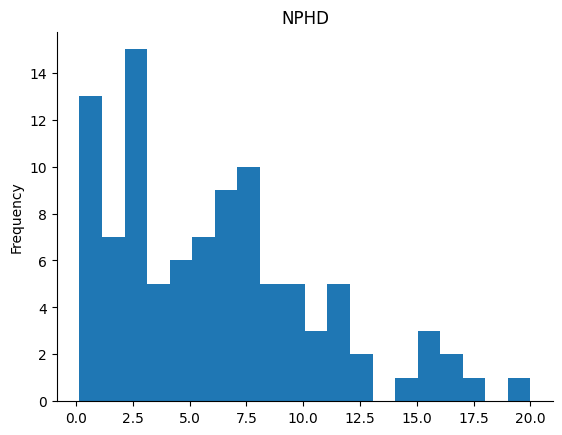

In [ ]:
from matplotlib import pyplot as plt
nphd_df['NPHD'].plot(kind='hist', bins=20, title='NPHD')
plt.gca().spines[['top', 'right',]].set_visible(False)

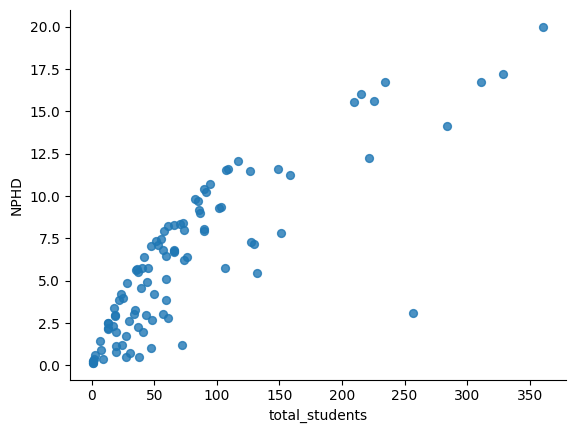

In [ ]:
from matplotlib import pyplot as plt
nphd_df.plot(kind='scatter', x='total_students', y='NPHD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Train, validate, test Datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is already defined and contains the necessary columns
# Here, 'NT', 'NE', 'NP', and 'SS' are column names

# Split the data into features (X) and target variable (y)
X = nphd_df[['total_students']]
y = nphd_df['NPHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
reg = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.196486334043248


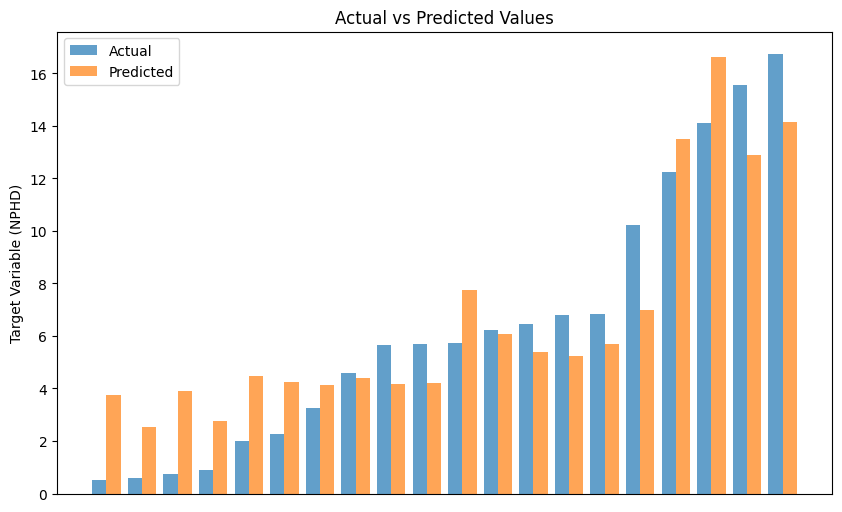

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the actual and predicted values in y_test and y_pred

# Get indices for sorting
indices = np.argsort(y_test)

# Sort actual and predicted values based on y_test
y_test_sorted = np.array(y_test)[indices]
y_pred_sorted = np.array(y_pred)[indices]

# Create an array for the x-axis ticks
x_ticks = np.arange(len(y_test))

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for actual values
plt.bar(x_ticks - 0.2, y_test_sorted, width=0.4, label='Actual', alpha=0.7)

# Bar plot for predicted values
plt.bar(x_ticks + 0.2, y_pred_sorted, width=0.4, label='Predicted', alpha=0.7)

# Hide x-axis values
plt.xticks([])

# Adding labels and title
# plt.xlabel('Sample Index')
plt.ylabel('Target Variable (NPHD)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


# Calculate Economically and Socially Challenged Students (ESCS)

In [ ]:
# Initialize lists to store total values and file names
all_nesc_values = []
escs_file_names = []

# Loop through PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            # Use tabula to extract tables from the PDF
            tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

            # Assuming tables[0] contains '2020-21' column and tables[1] contains 'Total Students' column
            students_tution = tables[1]['No. of students\rreceiving full\rtuition fee\rreimbursement\rfrom Institution\rFunds'].sum()
            total_students = tables[1]['Total Students'].sum()
            nesc_value = (students_tution/total_students)*100

            # Append the values to the lists
            all_nesc_values.append(nesc_value)
            escs_file_names.append(filename)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Create a single DataFrame with 'NT', 'NE', and 'File Name' columns
escs_dataframe = pd.DataFrame({'NESC': all_nesc_values, 'File Name': escs_file_names})

# Display the combined DataFrame
print("Combined DataFrame:")
escs_dataframe


Dec 17, 2023 10:01:02 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:06 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:12 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:19 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023 10:01:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Dec 17, 2023

Combined DataFrame:


,NESC,File Name
0,43.444227,iit madras.pdf
1,33.394761,iit delhi.pdf
2,9.521554,iit bombay.pdf
3,41.934934,iit kanpur.pdf
4,30.051299,iit roorkee.pdf
...,...,...
95,1.372658,R.V. College of Engineering.pdf
96,19.383521,IIITDM.pdf
97,14.345550,SR University.pdf
98,16.077170,"Amity University Haryana, Gurgaon.pdf"


In [ ]:
escs_df = pd.DataFrame({'ESCS': [7.86, 8.33, 4.41, 7.53, 5.38, 5.88, 0.95, 3.46, 8.41, 8.24, 0.12, 9.99, 4.14, 5.76, 9.17, 8.69, 7.76, 4.71, 5.44, 0.79, 4.73, 7.91, 9.76, 1.10, 0.02, 9.16, 1.30, 0.80, 3.19, 5.42, 0.16, 3.23, 9.31, 0.44, 9.83, 7.80, 7.50, 4.56, 1.86, 4.02, 7.02, 3.48, 8.16, 0.48, 3.81, 8.38, 6.48, 4.38, 9.82, 0.00, 11.1, 3.56, 1.01, 0.07, 0.43, 10.03, 0.00, 3.46, 9.70, 2.36, 1.51, 0.43, 2.12, 6.17, 3.58, 2.28, 5.35, 4.49, 4.79, 8.41, 0.00, 9.37, 5.50, 0.00, 0.67, 0.19, 3.17, 1.73, 3.36, 10.01, 7.22, 12.68, 6.24, 1.21, 5.86, 9.08, 6.27, 3.44, 3.61, 2.74, 8.66, 0.41, 2.47, 6.19, 10.14, 2.29, 6.09, 6.36, 2.83, 5.64]})

In [ ]:
# Concatenate the two DataFrames vertically (along rows)
escs_df = pd.concat([escs_df, escs_dataframe], axis=1)

# Display relationship between ESCS vs NESC

In [ ]:
escs_df

,ESCS,NESC,File Name
0,7.86,43.444227,iit madras.pdf
1,8.33,33.394761,iit delhi.pdf
2,4.41,9.521554,iit bombay.pdf
3,7.53,41.934934,iit kanpur.pdf
4,5.38,30.051299,iit roorkee.pdf
...,...,...,...
95,2.29,1.372658,R.V. College of Engineering.pdf
96,6.09,19.383521,IIITDM.pdf
97,6.36,14.345550,SR University.pdf
98,2.83,16.077170,"Amity University Haryana, Gurgaon.pdf"


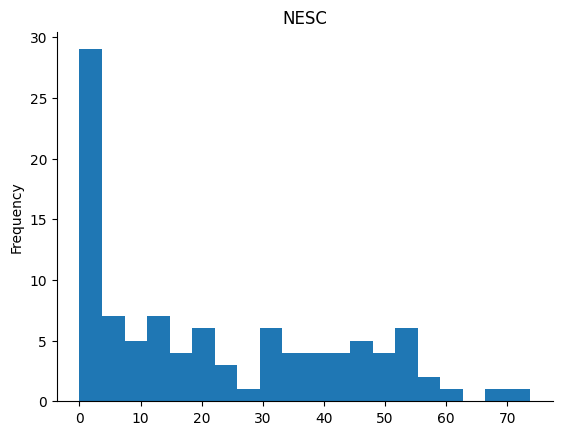

In [ ]:
from matplotlib import pyplot as plt
escs_df['NESC'].plot(kind='hist', bins=20, title='NESC')
plt.gca().spines[['top', 'right',]].set_visible(False)

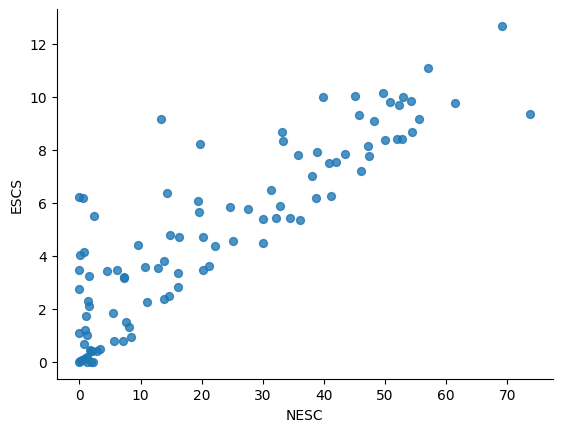

In [ ]:
from matplotlib import pyplot as plt
escs_df.plot(kind='scatter', x='NESC', y='ESCS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Train, test datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is already defined and contains the necessary columns
# Here, 'NT', 'NE', 'NP', and 'SS' are column names

# Split the data into features (X) and target variable (y)
X = escs_df[['NESC']]
y = escs_df['ESCS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
reg = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.0346055313291473


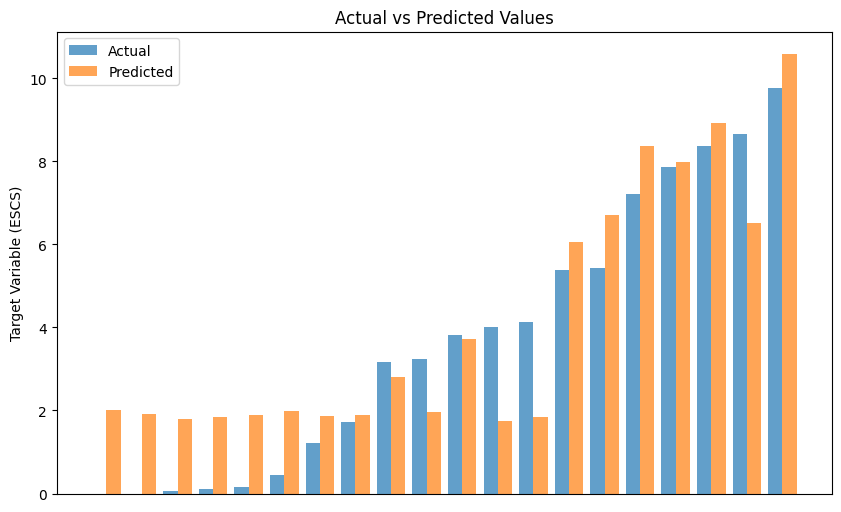

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the actual and predicted values in y_test and y_pred

# Get indices for sorting
indices = np.argsort(y_test)

# Sort actual and predicted values based on y_test
y_test_sorted = np.array(y_test)[indices]
y_pred_sorted = np.array(y_pred)[indices]

# Create an array for the x-axis ticks
x_ticks = np.arange(len(y_test))

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for actual values
plt.bar(x_ticks - 0.2, y_test_sorted, width=0.4, label='Actual', alpha=0.7)

# Bar plot for predicted values
plt.bar(x_ticks + 0.2, y_pred_sorted, width=0.4, label='Predicted', alpha=0.7)

# Hide x-axis values
plt.xticks([])

# Adding labels and title
# plt.xlabel('Sample Index')
plt.ylabel('Target Variable (ESCS)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()
